In [1]:
# Importing Classes from Packages
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score  
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import numpy as np

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import numpy as np
from datetime import datetime

In [3]:
# Importing Classes from Packages.
import statsmodels.api as sm
from statsmodels.formula.api import ols
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
import patsy
from sklearn.decomposition import PCA

from sklearn.metrics import mean_squared_error, r2_score, accuracy_score  
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.pipeline import Pipeline

C:\Users\nonob\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Data set read in and cleaning

In [40]:
# state dictionary
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

### This new data set from Medicare.gov looks at the distribution of Average Medicare spending Per Episode among states

In [41]:
# reading in a new data set
df = pd.read_csv('../datasets/st3.csv')

In [42]:
df.shape

(69344, 13)

In [43]:
df.columns

Index(['Hospital_Name', 'Provider_ID', 'State', 'Period', 'Claim_Type',
       'AvgSpendPerEpHosp', 'AvgSpendPerEpState', 'AvgSpendPerEpNat',
       '%SpendHosp', '%SpendState', '%SpendNat', 'Start_Date', 'End_Date'],
      dtype='object')

### This shows states with the number of providers within it and their average spending
#### we can also look at the different episodes periods and claim types per state hospitals

In [44]:
df1 = pd.DataFrame({'count': df.groupby(['State','Hospital_Name'])['AvgSpendPerEpHosp'].mean()}).reset_index()

In [45]:
df1.columns=['State','Hospital_Name','AvgSpendPerEpHosp']

In [46]:
df1.shape

(3143, 3)

In [47]:
df1.head(2)

,State,Hospital_Name,AvgSpendPerEpHosp
0,AK,ALASKA NATIVE MEDICAL CENTER,1662.409091
1,AK,ALASKA REGIONAL HOSPITAL,1823.090909


In [48]:
# grouping by state to know the number of providers in each state
df11 = pd.DataFrame(df1.groupby(['State']).agg({'Hospital_Name':'count','AvgSpendPerEpHosp':'mean'})).reset_index()

#### This shows the number of providers in each state and the state total average hospital spending

In [49]:

df11 = df11.sort_values(by='State',ascending=True)

In [50]:
df11.head(3)

,State,Hospital_Name,AvgSpendPerEpHosp
0,AK,8,1437.278409
1,AL,83,1462.502738
2,AR,44,1608.939050


In [51]:
df11.shape

(50, 3)

### SHowing average spending base on types of period in each state by grouping states, period and aggregating the average spending on episode per hospital 

In [52]:
df1_ = pd.DataFrame(df.groupby(['State','Period']).agg({'AvgSpendPerEpHosp':'mean'})).reset_index()

In [53]:
df1_.shape

(200, 3)

In [54]:
df1_.head()

,State,Period,AvgSpendPerEpHosp
0,AK,1 through 30 days After Discharge from Index H...,569.285714
1,AK,1 to 3 days Prior to Index Hospital Admission,152.803571
2,AK,Complete Episode,15810.000000
3,AK,During Index Hospital Admission,1536.500000
4,AL,1 through 30 days After Discharge from Index H...,1018.065404


### grouping all Period types by states and also see how the number of Periods were distributed among states

In [55]:
df1_11 = pd.DataFrame(df1_.groupby(['State']).agg({'Period':'count','AvgSpendPerEpHosp':'mean'})).reset_index()

In [56]:
df1_11.head(3)

,State,Period,AvgSpendPerEpHosp
0,AK,4,4517.147321
1,AL,4,4596.429432
2,AR,4,5056.643669


### SHowing average spending base on type of claim in each state by grouping states, claim types and aggregate the average spending on episode per hospital 

In [57]:
# group by state, claim types and aggregate the average spending per episode per hospital
df11_ = pd.DataFrame(df.groupby(['State','Claim_Type']).agg({'AvgSpendPerEpHosp':'mean'})).reset_index()

In [58]:
df11_.head(3)

,State,Claim_Type,AvgSpendPerEpHosp
0,AK,Carrier,943.625000
1,AK,Durable Medical Equipment,23.500000
2,AK,Home Health Agency,79.333333


In [59]:
df11_.shape

(400, 3)

### grouping all Claim types by states and also see how the number of claims were distributed among states

In [60]:
df12_ = pd.DataFrame(df11_.groupby(['State']).agg({'Claim_Type':'count','AvgSpendPerEpHosp':'mean'})).reset_index()

In [61]:
df12_.shape

(50, 3)

In [62]:
df12_.head(3)

,State,Claim_Type,AvgSpendPerEpHosp
0,AK,8,2635.005208
1,AL,8,2681.252008
2,AR,8,2949.713068


### This new data set from Medicare.gov looks at the distribution of Average Medicare spending among states

In [63]:
# read in the data set
df1_ = pd.read_csv('../datasets/st2.csv')

In [64]:
# subset the dataframe
df_1 = df1_[['Provider State','TotalDischrg','AvgMedicarePay']]

In [65]:
# group by state and aggregate the todal number of discharge and the average medicare pay
df_1 = pd.DataFrame(df_1.groupby('Provider State').agg({'TotalDischrg':'sum','AvgMedicarePay':'mean'})).reset_index()

In [66]:
df_1.head(3)

,Provider State,TotalDischrg,AvgMedicarePay
0,AK,6142,12958.969437
1,AL,142704,6418.007120
2,AR,86769,6919.720832


### This new data set from DataUSA looks at the distribution of Smoking among states

### Testing what features to bring in 

In [67]:
# Smoking averages among states
df_sm = pd.read_csv('../datasets/smoking-State.csv')

In [68]:
# filter to creat subset dataframe
df_sm = df_sm[df_sm['year'] == 2016]

In [69]:
df_sm.head(2)

,year,geo_name,geo,adult_smoking
0,2016,West Virginia,04000US54,0.267
1,2016,Kentucky,04000US21,0.262


In [70]:
# subsetting 
df_sm1 = df_sm[['geo_name','adult_smoking']]

In [71]:
# renaming columns
df_sm1.columns=['State','Adult_smoking']

In [72]:
df_sm1.head(2)

,State,Adult_smoking
0,West Virginia,0.267
1,Kentucky,0.262


In [73]:
df_sm1.shape

(50, 2)

### This new data set from DataUSA looks at the distribution of Children in Poverty among states

In [74]:
# children in poverty by state data set
df_c = pd.read_csv('../datasets/chilldren_in_poverty.csv')

In [75]:
df_c.head()

,year,geo_name,geo,children_in_poverty
0,2015,Mississippi,04000US28,0.340
1,2017,Mississippi,04000US28,0.315
2,2016,Mississippi,04000US28,0.307
3,2015,New Mexico,04000US35,0.301
4,2015,Louisiana,04000US22,0.284


In [76]:
# filtering to create new subset dataframe
df_c = df_c[df_c['year']== 2016]

### This new data set from DataUSA looks at the distribution of median household among states

In [77]:
# median house hold by state data set
df_m = pd.read_csv('../datasets/median-household.csv')

In [78]:
df_m = df_m[df_m['year']== 2015]

In [79]:
# droping some rows since they have no complete observations
df_m = df_m[(df_m['geo_name']!='Puerto Rico') & (df_m['geo_name'] != 'District of Columbia')]

In [80]:
df_m.head()

,year,geo_name,geo,income,income_moe,income_rank
0,2015,Maryland,04000US24,74551.0,370.0,1.0
3,2015,Alaska,04000US02,72515.0,838.0,2.0
4,2015,New Jersey,04000US34,72093.0,286.0,3.0
10,2015,Connecticut,04000US09,70331.0,409.0,5.0
12,2015,Hawaii,04000US15,69515.0,725.0,6.0


In [81]:
# subsetting dataframe
df_m = df_m[['geo_name','income']]

### This new data set from DataUSA looks at the distribution of Poverty rate among states

In [82]:
# poverty rate by state data set
df_b = pd.read_csv('../datasets/poverty-rate-state.csv')

In [83]:
df_b.head()

,year,geo_name,geo,income_below_poverty,pop_poverty_status,income_below_poverty.1,income_below_poverty_moe,pop_poverty_status.1,pop_poverty_status_moe
0,2015,California,04000US06,6135140.0,37678700.0,6135140.0,41900.0,37678700.0,3413.0
1,2014,California,04000US06,6115240.0,37323100.0,6115240.0,38636.0,37323100.0,3616.0
2,2013,California,04000US06,5885420.0,36913400.0,5885420.0,40552.0,36913400.0,3433.0
3,2014,Texas,04000US48,4500030.0,25479000.0,4500030.0,33436.0,25479000.0,3344.0
4,2015,Texas,04000US48,4472450.0,25923900.0,4472450.0,34267.0,25923900.0,3038.0


In [84]:
df_b = df_b[df_b['year']==2015]

In [85]:
# subsetting the dataframe for easy access going forward
df_b = df_b[['geo_name','income_below_poverty','pop_poverty_status']]

In [86]:
# Reasigning new columns names
df_b.columns=['geo_name','pop_in_poverty','Over_all_pop']

### Joining both DataFrame together

In [87]:
# merging the first two dataframes on geo_name which means state and the year in question
df_both = df_c.merge(df_sm, on=['geo_name','year'])

In [88]:
# dropping insignificant features
df_both = df_both.drop(['geo_x','geo_y',], axis=1)

In [89]:
df_both.shape

(50, 4)

In [90]:
# joining another dataframe
df_both = df_both.merge(df_m, on=['geo_name'])

In [91]:
# joining another dataframe
df_both = df_both.merge(df_b, on=['geo_name'])

In [92]:
df_both.columns=['year','State','children_in_poverty','adult_smoking','income','pop_in_poverty','Over_all_pop']

In [93]:
# replacing the abbreviated string to their respective full name
# this allows for merging with other data sets having different name with variable to join on
def pick(df, col):
    for c in states.keys():
        for i in col:
            if i[0:1] == c[0:1]:
                df[col] = states.values()

In [94]:
# calling the function
pick(df11, 'State')

In [95]:
# Reasigning columns name
df11.columns=['State','Num_of_Providers','AvgSpendPerEpHosp']

In [96]:
df11.head(10)

,State,Num_of_Providers,AvgSpendPerEpHosp
0,Alaska,8,1437.278409
1,Alabama,83,1462.502738
2,Arkansas,44,1608.939050
3,Arizona,61,1723.367362
4,California,286,1813.770343
5,Colorado,45,1805.097980
6,Connecticut,29,1752.694357
7,Delaware,7,1900.681818
8,Florida,6,1811.151515
9,Georgia,166,1777.093647


In [97]:
df11.shape

(50, 3)

In [98]:
# joining another dataframe
df_x = df_both.merge(df11, on=['State'])

In [99]:
# Newest dataframe
df_x = df_x.drop('year', axis=1)
df_x.head(3)

,State,children_in_poverty,adult_smoking,income,pop_in_poverty,Over_all_pop,Num_of_Providers,AvgSpendPerEpHosp
0,Mississippi,0.307,0.230,39665.0,651545.0,2890920.0,58,1499.510972
1,New Mexico,0.280,0.191,44963.0,429361.0,2043680.0,29,1452.098746
2,Louisiana,0.280,0.240,45047.0,888280.0,4494990.0,63,1580.971140


In [100]:
df_x.shape

(50, 8)

### This new data set from USDA (United State Depertment of Agriculture) looks at the distribution of Population among states

In [101]:
file = r'../datasets/PopulationEstimates.xls'
df = pd.read_excel(file)

In [102]:
df.columns = df.loc[1,:]

In [103]:
df = df.dropna()

In [104]:
df = df.loc[2:]

In [105]:
df.head(1)

1,FIPS,State,Area_Name,Rural-urban_Continuum Code_2003,Rural-urban_Continuum Code_2013,Urban_Influence_Code_2003,Urban_Influence_Code_2013,Economic_typology_2015,CENSUS_2010_POP,ESTIMATES_BASE_2010,...,R_DOMESTIC_MIG_2013,R_DOMESTIC_MIG_2014,R_DOMESTIC_MIG_2015,R_DOMESTIC_MIG_2016,R_NET_MIG_2011,R_NET_MIG_2012,R_NET_MIG_2013,R_NET_MIG_2014,R_NET_MIG_2015,R_NET_MIG_2016
4,01001,AL,Autauga County,2,2,2,2,0,54571,54571,...,-4.60758,2.14997,-2.79969,4.12853,6.1638,-5.29552,-4.57116,2.25929,-2.65426,4.25528


In [106]:
df = df[['State','POP_ESTIMATE_2016']]

In [107]:
df = pd.DataFrame(df.groupby('State').agg({'POP_ESTIMATE_2016':'sum'})).reset_index()

In [108]:
df = df[df['State'] !='DC']

In [109]:
#df.sort_values(by='State',ascending=True)

In [110]:
# calling the function
pick(df, 'State')

In [111]:
df.head(2)

,State,POP_ESTIMATE_2016
0,Alaska,718772
1,Alabama,4863300


In [112]:
# joining another dataframe
df_x = df_x.merge(df, on=['State'])

In [113]:
# Newest dataframe
df_x = df_x.drop('Over_all_pop', axis=1)

In [114]:
# Renaming columns
df_x.columns=['State','Children_in_poverty','Adult_smoking','Income','Pop_in_poverty','Num_of_Providers',
              'AvgSpendPerEpHosp','Pop_over_all']

In [115]:
df_x.head()

,State,Children_in_poverty,Adult_smoking,Income,Pop_in_poverty,Num_of_Providers,AvgSpendPerEpHosp,Pop_over_all
0,Mississippi,0.307,0.230,39665.0,651545.0,58,1499.510972,2988726
1,New Mexico,0.280,0.191,44963.0,429361.0,29,1452.098746,2081015
2,Louisiana,0.280,0.240,45047.0,888280.0,63,1580.971140,4681666
3,Alabama,0.274,0.211,43623.0,887260.0,83,1462.502738,4863300
4,South Carolina,0.264,0.215,45483.0,830901.0,54,1621.388889,4961119


### This new data set from USDA (United State Depertment of Agriculture) looks at the distribution of Poverty rate among states

In [116]:
# reading in a new data set
file1 = r'../datasets/PovertyEstimates.xls'
df1 = pd.read_excel(file1)

In [117]:
df1.columns = df1.loc[2,:]

In [118]:
df1 = df1[['State','POVALL_2016']]

In [119]:
df1 = df1.loc[5:]

In [120]:
df1 = df1.loc[2:]

In [121]:
df1 = pd.DataFrame(df1.groupby('State').agg({'POVALL_2016':'sum'})).reset_index()

In [122]:
df1 = df1[df1['State'] !='DC']

In [123]:
# calling the function
pick(df1, 'State')
df1.columns=['State','Poverty_overall']

In [124]:
df1.head(3)

,State,Poverty_overall
0,Alaska,143831
1,Alabama,814190
2,Arkansas,994772


In [125]:
df_x = df_x.merge(df1, on=['State'])

In [126]:
df_x = df_x.drop('Pop_in_poverty',axis=1)

### This new data set from USDA(United State Depertment of Agriculture) looks at the distribution of Education among states

In [127]:
# reading in a new data set
file2 = r'../datasets/Education.xls'
df2 = pd.read_excel(file2)

In [128]:
df2.columns = df2.loc[3,:]

In [129]:
df2 = df2[["State","Bachelor's degree or higher, 2012-2016"]]

In [130]:
df2 = df2.loc[6:]
df2.columns=['State',"Degree_or_higher"]

In [131]:
df2 = pd.DataFrame(df2.groupby('State').agg({'Degree_or_higher':'sum'})).reset_index()

In [132]:
df2 = df2[(df2['State'] !='DC') & (df2['State'] != 'PR')]

In [133]:
# calling the function
pick(df2, 'State')

In [134]:
# merging dataframes
df_x = df_x.merge(df2, on=['State'])

### Reading in a new data set from cdc having assumed that taxrate and median house value might be correlated in some way with medicarespending

In [135]:
# Reading in a new data set
dif = pd.read_csv('../datasets/dfff.csv')

In [136]:
# subseting the new dataframe
dif.columns=['State','TaxRate','Median_house_V']

In [137]:
# previewing the head
dif.head(2)

,State,TaxRate,Median_house_V
0,Alabama,0.010704,97627.328358
1,Alaska,0.061934,159202.856000


In [138]:
# merging dataframes
df_x = df_x.merge(dif, on=['State'])

In [139]:
# sorting dataframe by state alphabetically
df_x.sort_values(by='State',ascending=True).head(2)

,State,Children_in_poverty,Adult_smoking,Income,Num_of_Providers,AvgSpendPerEpHosp,Pop_over_all,Poverty_overall,Degree_or_higher,TaxRate,Median_house_V
3,Alabama,0.274,0.211,43623.0,83,1462.502738,4863300,814190,783076,0.010704,97627.328358
38,Alaska,0.155,0.199,72515.0,8,1437.278409,718772,143831,271050,0.061934,159202.856000


In [140]:
# New dataframe
df_1.head(3)

,Provider State,TotalDischrg,AvgMedicarePay
0,AK,6142,12958.969437
1,AL,142704,6418.007120
2,AR,86769,6919.720832


In [141]:
# subseting dataframe
df_1.columns=['State','TotalDischrg','AvgMedicarePay']

In [142]:
# filtering needed states
df_1 = df_1[df_1['State'] != 'DC']

In [143]:
# New dataframe dimension
df_1.shape

(50, 3)

In [144]:
# calling function to convert abbreviated string to fullname string
pick(df_1, 'State')

In [145]:
df_1.head(2)

,State,TotalDischrg,AvgMedicarePay
0,Alaska,6142,12958.969437
1,Alabama,142704,6418.007120


In [146]:
# merging both dataframe 
df_x = df_x.merge(df_1, on='State')

In [150]:
# write out to csv file
df_x.to_csv('df_x.csv', index=False)

### FUNCTION THAT ACCEPTS A DATAFRAME AND FEATURE COLUMNS TO CALCULATE THEIR RATIOS

In [151]:
def ratios_med(df, col1, col2, col3, col4, col5, col6, col7, col8, col9, col10, col11, col12, cols1, cols2, cols3, cols4, cols5,
               cols6, cols7, cols8, cols9, cols10, cols11):
    
    df[cols1] = (df[col1] / df[col12]) * 100
    
    df[cols2] = (df[col2] / df[col12]) * 100
    
    df[cols3] = (df[col3] / df[col12]) * 100
    
    df[cols4] = (df[col4] / df[col12]) * 100
    
    df[cols5] = (df[col5] / df[col12]) * 100
    
    df[cols6] = (df[col6] / df[col12]) * 100
    
    df[cols7] = (df[col7] / df[col12]) * 100 
    df[cols8] = (df[col8] / df[col12]) * 100
    df[cols9] = (df[col9] / df[col12]) * 100
    df[cols10] = (df[col10] / df[col12]) * 100
    df[cols11] = (df[col11] / df[col12]) * 100
    
    return df

In [152]:
# calling the function to create ratios of every feature in consideration
df_xx = ratios_med(df_x, 'Children_in_poverty', 'Adult_smoking', 'Income','Num_of_Providers', 'AvgSpendPerEpHosp',
                   'Pop_over_all','Poverty_overall', 'Degree_or_higher', 'TaxRate', 'Median_house_V','TotalDischrg',
                   'AvgMedicarePay','ratio_child','ratio_adult','ratio_income','ratio_num_prov','ratio_avgspend','ratio_pop',
                  'ratio_poverty','ratio_education','ratio_tax','ratio_median','ratio_total_disch')

In [153]:
df_xx['Num_of_Providers'] = df_xx['Num_of_Providers'].astype(float) 

In [154]:
# function to scale any variable varible
def scale(df, col):
    d = df[col]/100

    return d

In [155]:
# scaling ratio education variable
df_xx['ratio_education'] = scale(df_xx, 'ratio_education')

In [156]:
# scaling ratio poverty variable
df_xx['ratio_poverty'] = scale(df_xx, 'ratio_poverty')
# scaling ratio median house value variable
df_xx['ratio_median'] = scale(df_xx, 'ratio_median')
# scaling ratio total number of discharges variable
df_xx['ratio_total_disch'] = scale(df_xx, 'ratio_total_disch')
# scaling ratio total population variable
df_xx['ratio_pop'] = scale(df_xx, 'ratio_pop')
# scaling ratio income variable
df_xx['ratio_income'] = scale(df_xx, 'ratio_income')
# scaling number of providers
df_xx['Num_of_Providers'] = scale(df_xx, 'Num_of_Providers')

In [159]:
# previewing the head of the dataframe
df_xx.head()

,State,Children_in_poverty,Adult_smoking,Income,Num_of_Providers,AvgSpendPerEpHosp,Pop_over_all,Poverty_overall,Degree_or_higher,TaxRate,...,ratio_adult,ratio_income,ratio_num_prov,ratio_avgspend,ratio_pop,ratio_poverty,ratio_education,ratio_tax,ratio_median,ratio_total_disch
0,Mississippi,0.307,0.230,39665.0,0.58,1499.510972,2988726,1213744,819782,0.014467,...,0.003228,5.567662,0.814129,21.048203,419.518847,170.369744,115.070435,0.000203,11.551950,13.085444
1,New Mexico,0.280,0.191,44963.0,0.29,1452.098746,2081015,780919,732476,0.014490,...,0.002301,5.417156,0.349393,17.494931,250.721332,94.085363,88.248936,0.000175,13.696768,3.243932
2,Louisiana,0.280,0.240,45047.0,0.63,1580.971140,4681666,1823939,1407750,0.022171,...,0.003249,6.097564,0.852768,21.400032,633.710501,246.888458,190.553098,0.000300,12.747728,14.872820
3,Alabama,0.274,0.211,43623.0,0.83,1462.502738,4863300,814190,783076,0.010704,...,0.003288,6.796970,1.293236,22.787490,757.758586,126.860252,122.012330,0.000167,15.211471,22.234939
4,South Carolina,0.264,0.215,45483.0,0.54,1621.388889,4961119,1479149,1730114,0.017594,...,0.002730,5.774643,0.685598,20.585585,629.876864,187.796691,219.659875,0.000223,14.171009,15.412378


In [160]:
# function to scale my target varible
for i in df_xx.columns:
    if i == 'AvgMedicarePay':
        a = df_xx[i] / 100

In [161]:
# scaling my target variable 
df_xx['AvgMedicarePay'] = a

### Exploratory Data Analysis (EDA)

In [162]:
# subsetting dataframe
j = df_xx[['AvgMedicarePay','ratio_child', 'Adult_smoking','Income', 'ratio_num_prov', 'ratio_avgspend',
           'Pop_over_all','Poverty_overall','ratio_education', 'TaxRate', 'ratio_median','ratio_total_disch']]

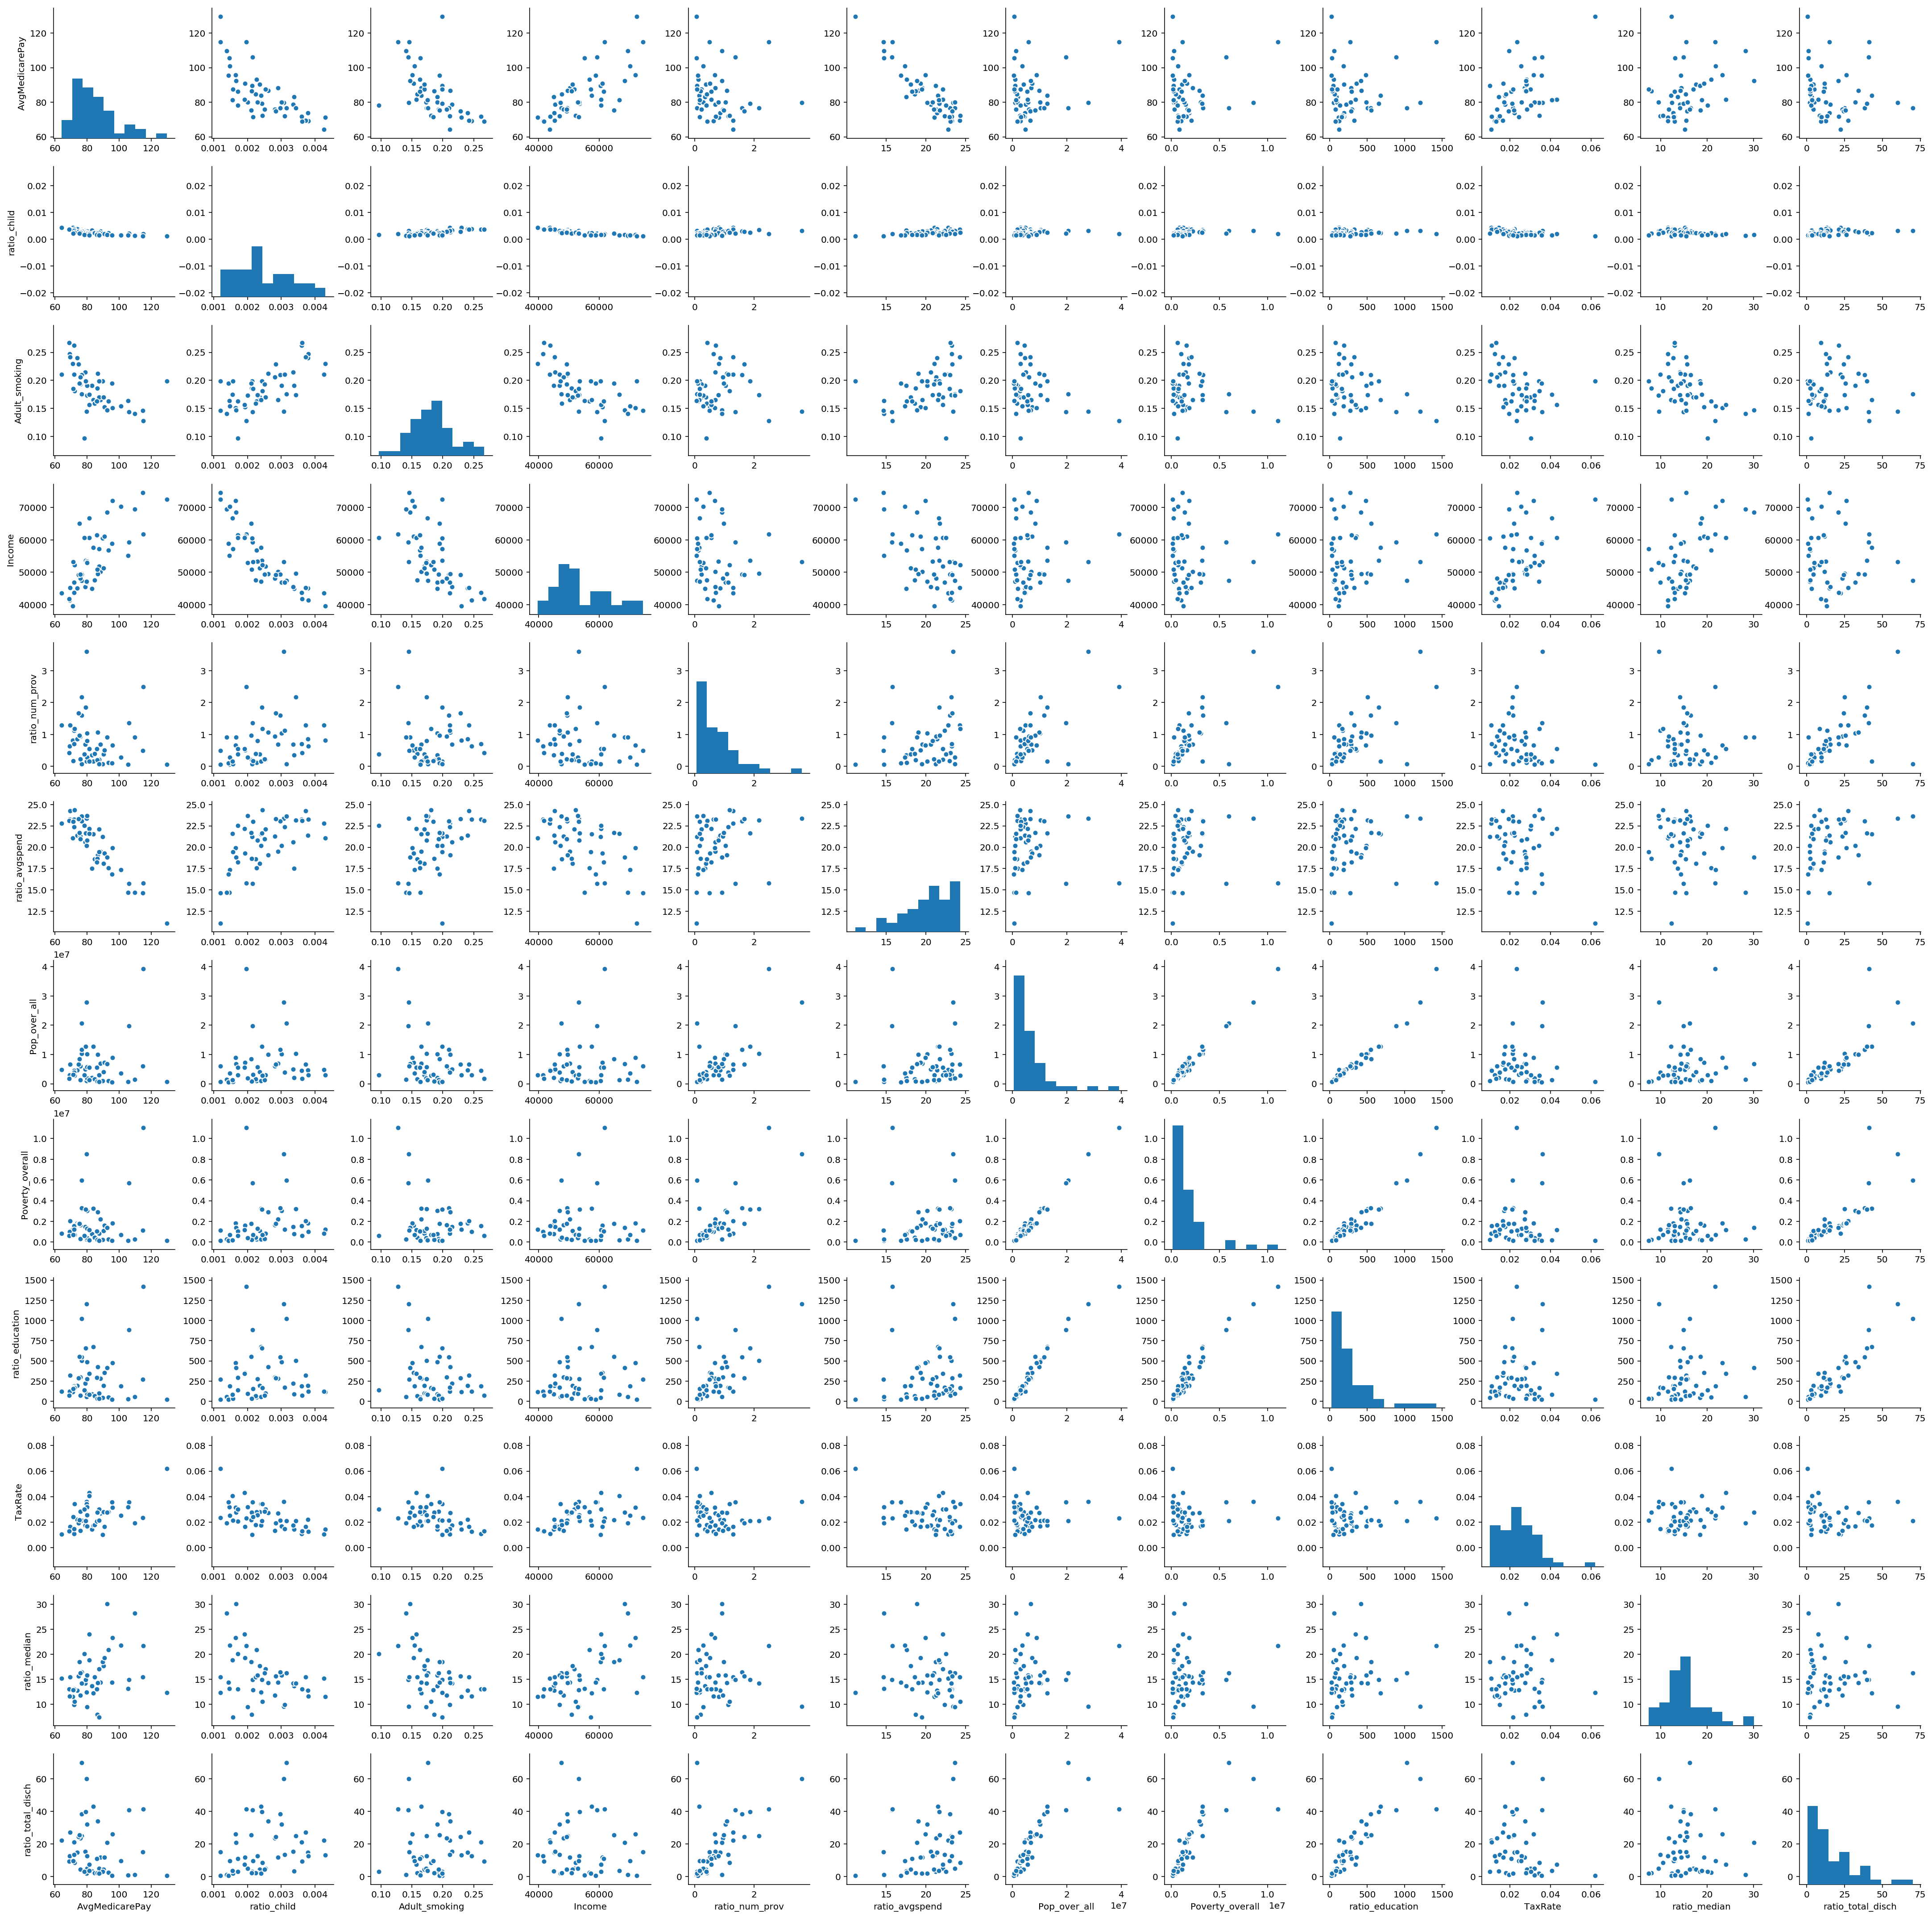

In [163]:
# A pairplot
sns.pairplot(j)

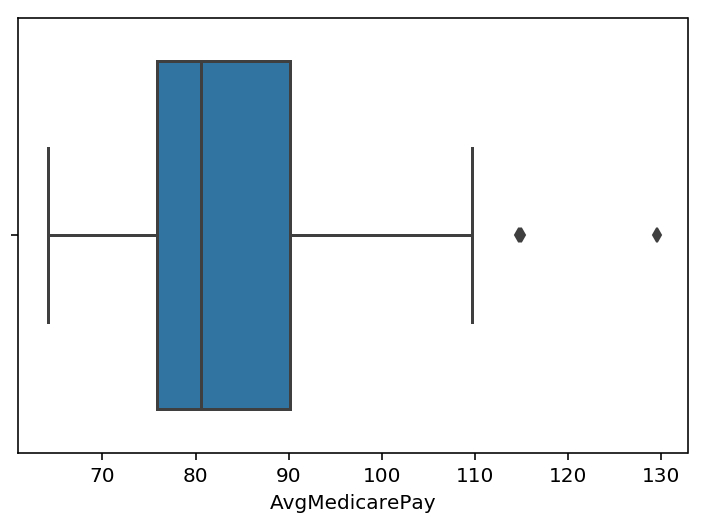

In [164]:
# Boxplot of the target variable to show the spread of the Average medicare payment.
sns.boxplot(df_xx['AvgMedicarePay'])

Text(0.5,0,'Average Medicare Payment')

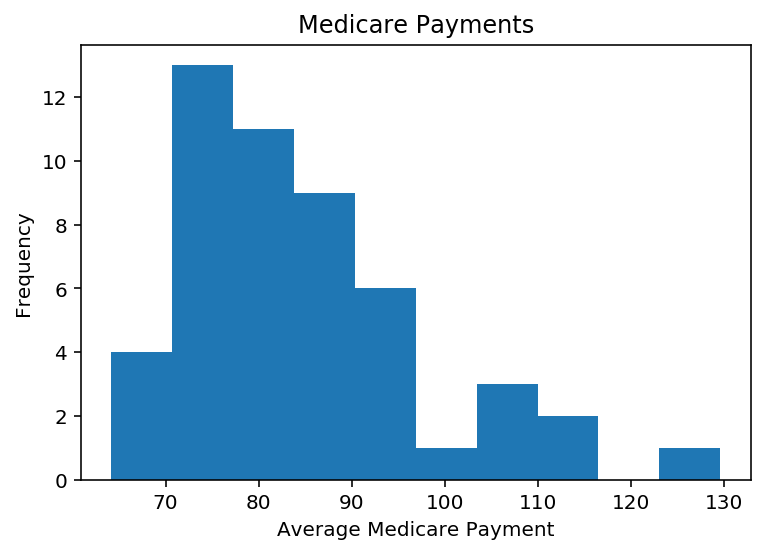

In [236]:
# Histogramm plot showing Average medicare payment among states
df_xx.groupby(['State'])['AvgMedicarePay'].first().sort_values(ascending=False).plot('hist', title = 'Medicare Payments')
plt.xlabel('Average Medicare Payment')

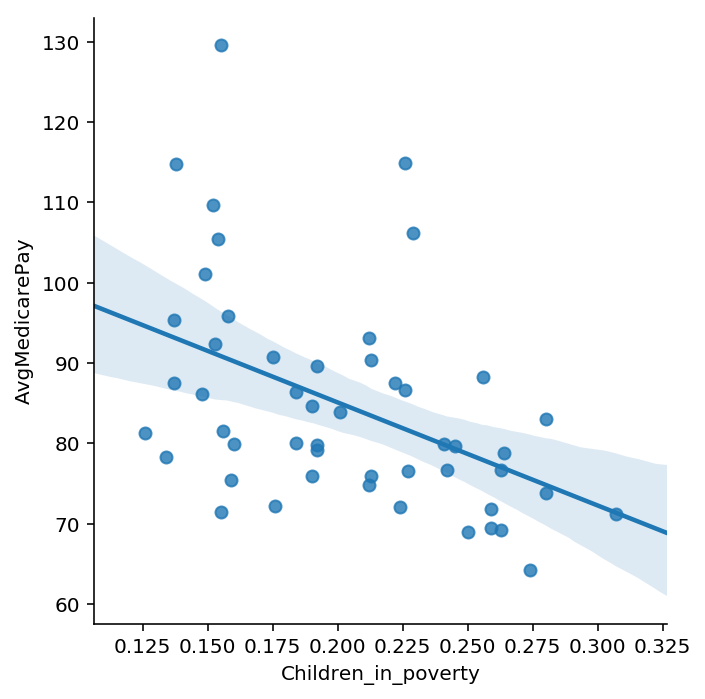

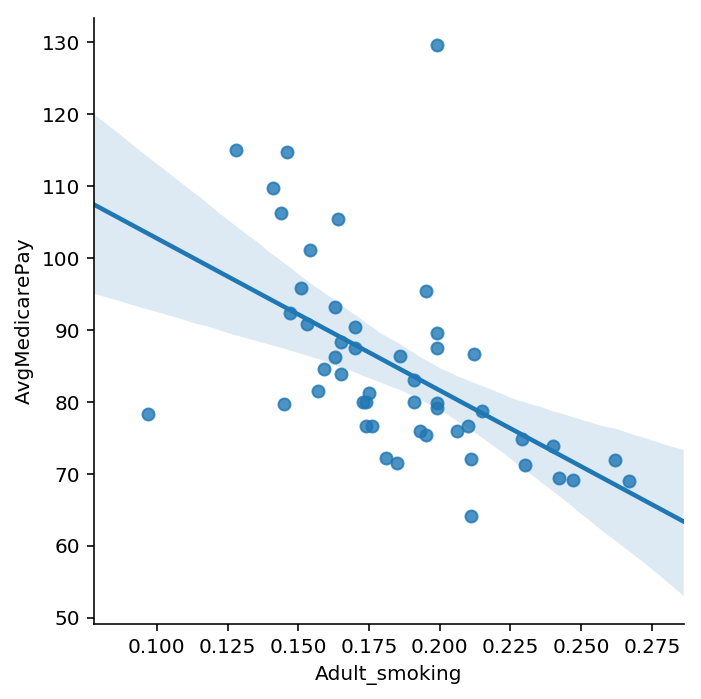

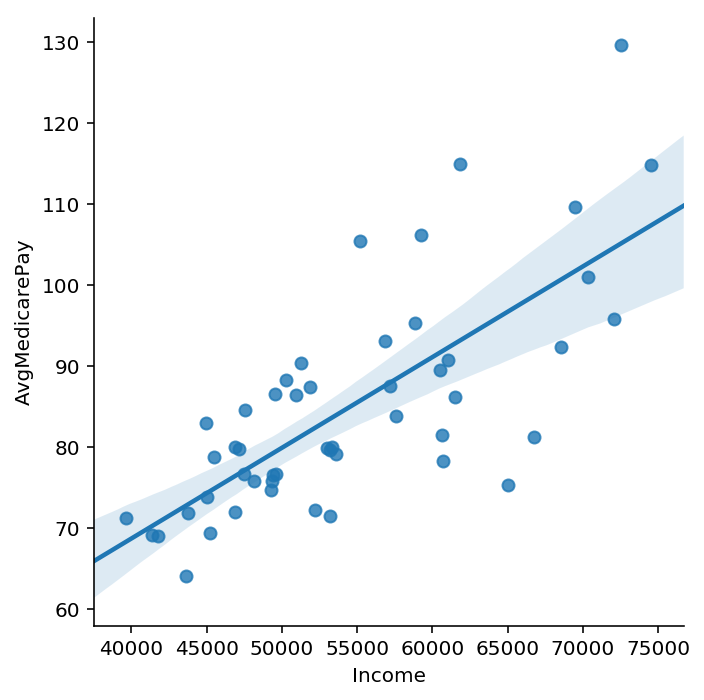

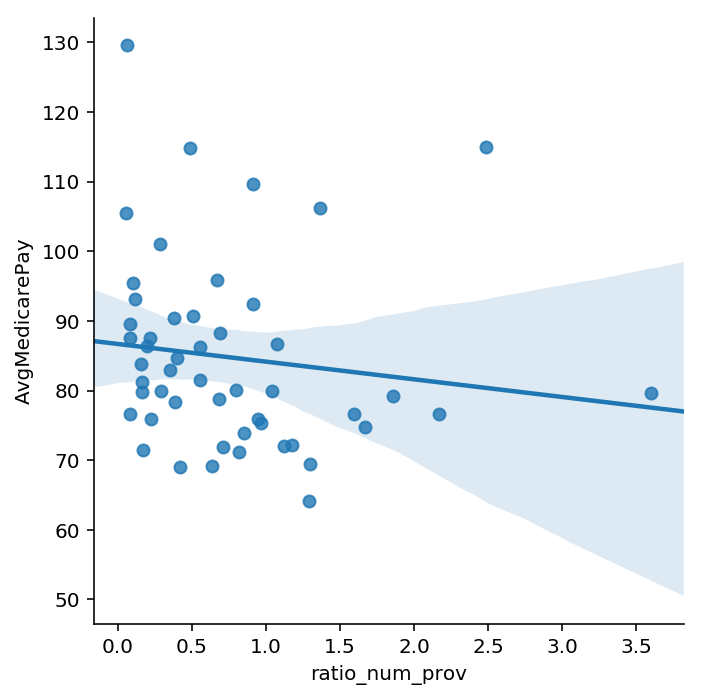

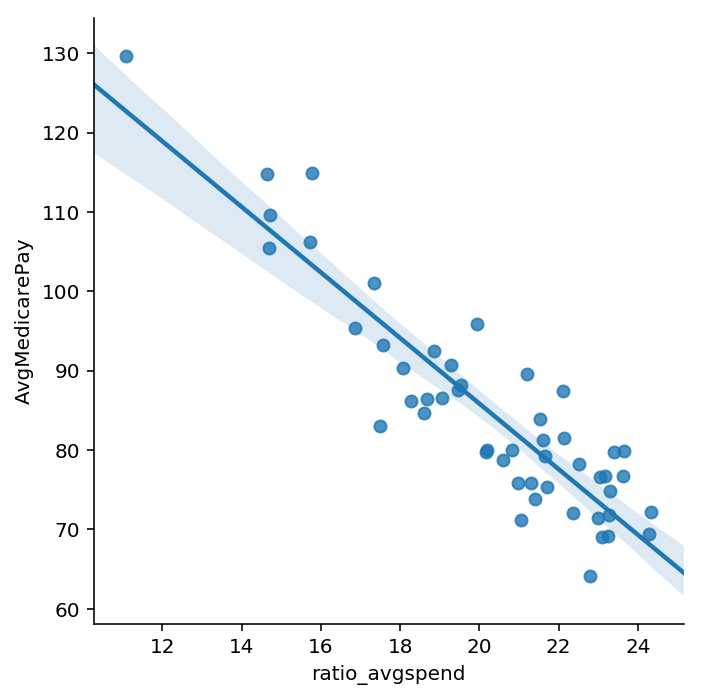

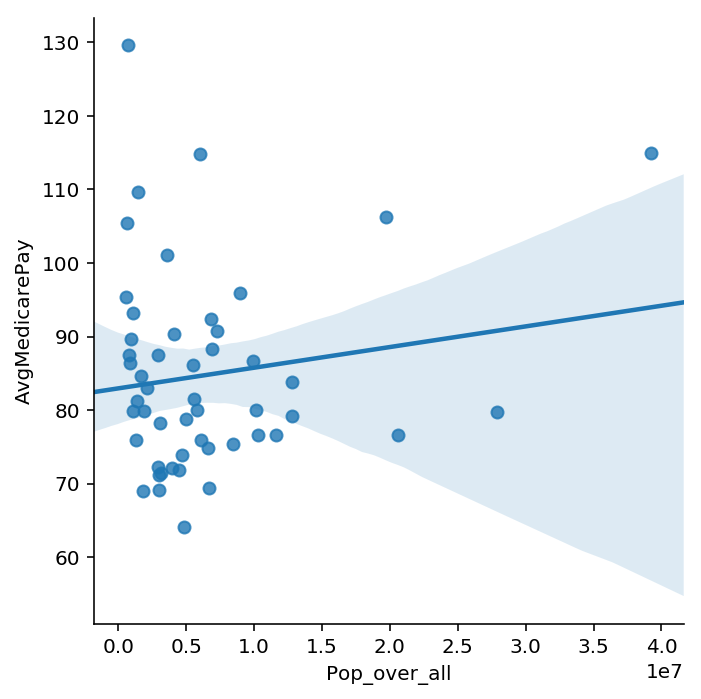

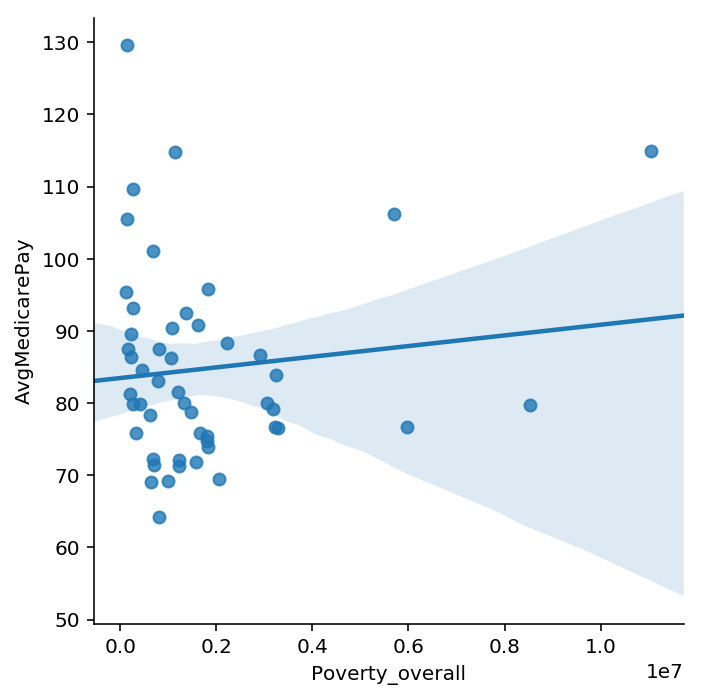

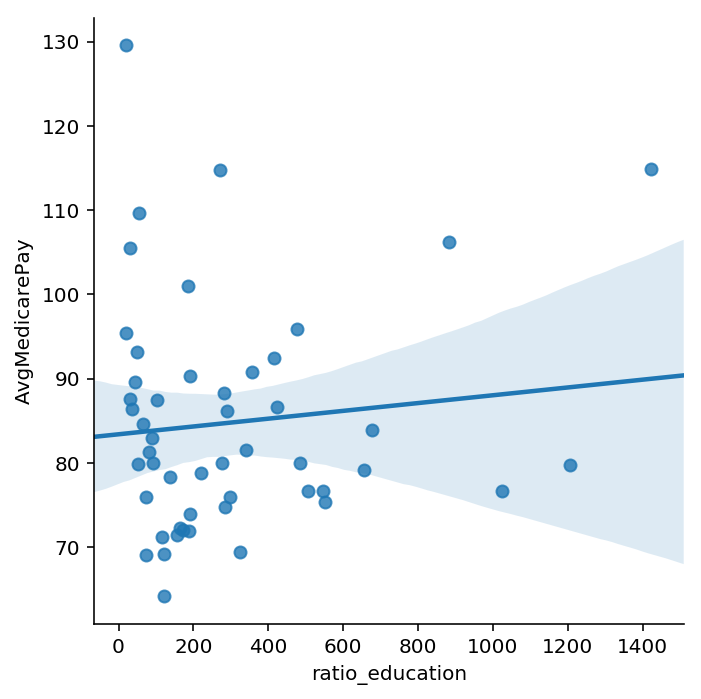

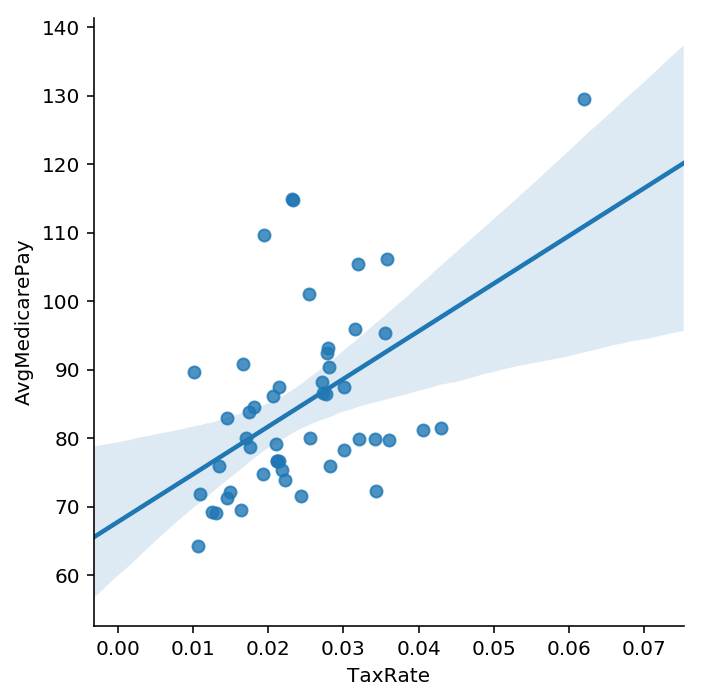

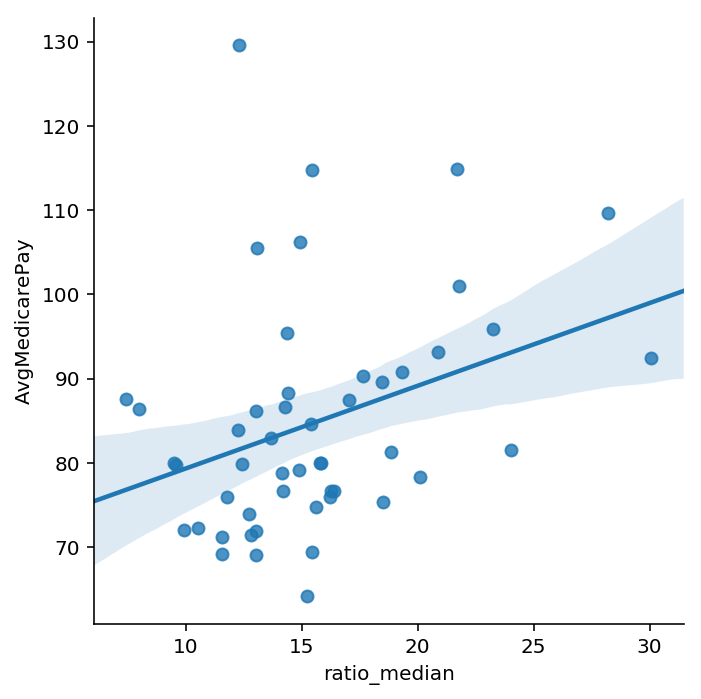

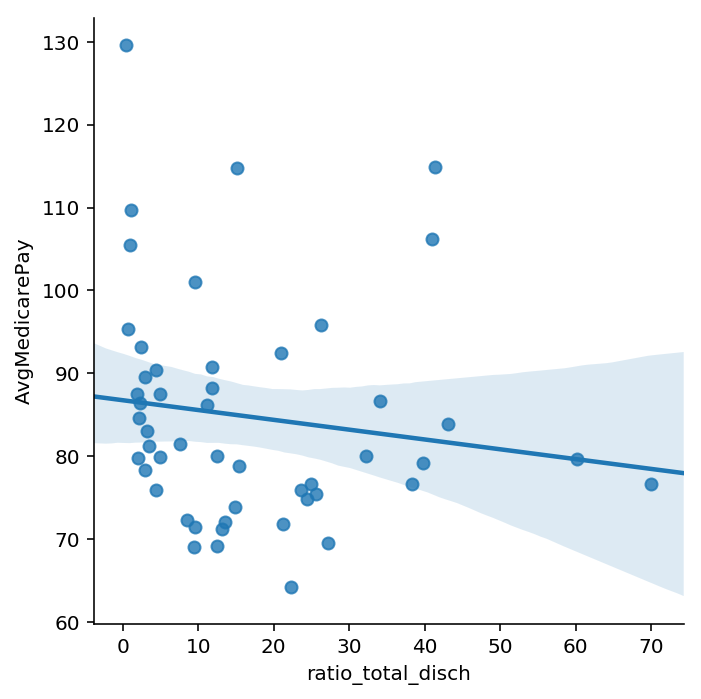

In [166]:
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

sns.lmplot(x='Children_in_poverty', y='AvgMedicarePay', data=df_xx)
plt.show()
sns.lmplot(x='Adult_smoking', y='AvgMedicarePay', data=df_xx)
plt.show()
sns.lmplot(x='Income', y='AvgMedicarePay', data=df_xx)
plt.show()
sns.lmplot(x='ratio_num_prov', y='AvgMedicarePay', data=df_xx)
plt.show()
sns.lmplot(x='ratio_avgspend', y='AvgMedicarePay', data=df_xx)
plt.show()
sns.lmplot(x='Pop_over_all', y='AvgMedicarePay', data=df_xx)
plt.show()
sns.lmplot(x='Poverty_overall', y='AvgMedicarePay', data=df_xx)
plt.show()
sns.lmplot(x='ratio_education', y='AvgMedicarePay', data=df_xx)
plt.show()
sns.lmplot(x='TaxRate', y='AvgMedicarePay', data=df_xx)
plt.show()
sns.lmplot(x='ratio_median', y='AvgMedicarePay', data=df_xx)
plt.show()
sns.lmplot(x='ratio_total_disch', y='AvgMedicarePay', data=df_xx)
plt.show()

### Below will be about feature selection and i decided to select features base on their coefficients significance using stats model gives a good summary of that. So i am going to explain sort of interprete whatever step taken and descision bease on outcome
selecting target variable and predictors using for loop however different methods will be used to do the same process since they all will arrive at the same outcome

In [167]:
# subseting dataframe into target and predictor variable.
yy = df_xx.AvgMedicarePay
# this means select all variable/features name that is not AverageMedicarePay and State
XX = df_xx[['ratio_child', 'Adult_smoking','Income', 'ratio_num_prov', 'ratio_avgspend', 'Pop_over_all','Poverty_overall', 
        'ratio_education', 'TaxRate', 'ratio_median','ratio_total_disch']]

In [168]:
# fit our model with .fit() and show results
# we use statsmodels' formula API to invoke the syntax below,
# where we write out the formula using ~
medic_model = ols("yy ~ XX ", data=df_xx).fit()

In [169]:
# summarizing our model
medic_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     yy   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     64.75
Date:                Fri, 06 Apr 2018   Prob (F-statistic):           3.87e-21
Time:                        15:37:05   Log-Likelihood:                -126.19
No. Observations:                  50   AIC:                             276.4
Df Residuals:                      38   BIC:                             299.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    109.7121     12.513      8.768      0.000      84.382     135.042
XX[0]      -1889.5206   1719.839     -1.099      0.279   -5371.152    1592.111
XX[1]          4.9243     23.976      0.205      0.838     -43.612      53.461
XX[2]          0.0006      0.000      3.986      0.000       0.000       0.001
XX[3]         -1.5137      1.132     -1.337      0.189      -3.806       0.778
XX[4]         -2.7941      0.245    -11.405      0.000      -3.290      -2.298
XX[5]      -4.256e-07   9.18e-07     -0.464      0.646   -2.28e-06    1.43e-06
XX[6]        6.77e-06   2.63e-06      2.574      0.014    1.45e-06    1.21e-05
XX[7]         -0.0333      0.014     -2.402      0.021      -0.061      -0.005
XX[8]         77.7318     68.230      1.139      0.262     -60.393     215.857
XX[9]          0.0548      0.146      0.376      0.709      -0.240       0.350
XX[10]         0.1386      0.106      1.313      0.197      -0.075       0.352
==============================================================================
Omnibus:                        0.814   Durbin-Watson:                   1.689
Prob(Omnibus):                  0.666   Jarque-Bera (JB):                0.224
Skew:                          -0.041   Prob(JB):                        0.894
Kurtosis:                       3.318   Cond. No.                     3.53e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.53e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Below is a different method which also gives same results as the above method
#### fit our model with .fit() and show results
#### we use statsmodels' formula API to invoke the syntax below,
#### where we write out the formula using ~


In [2904]:
model = ols("""AvgMedicarePay ~ ratio_child 
                                        + Adult_smoking 
                                        + Income
                                        + ratio_num_prov 
                                        + ratio_avgspend
                                        + Pop_over_all
                                        + Poverty_overall
                                        + ratio_education
                                        + TaxRate
                                        + ratio_median
                                        + ratio_total_disch
                                        """, data=df_xx).fit()

In [2905]:
# summarizing our model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         AvgMedicarePay   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     64.75
Date:                Fri, 06 Apr 2018   Prob (F-statistic):           3.87e-21
Time:                        09:29:21   Log-Likelihood:                -126.19
No. Observations:                  50   AIC:                             276.4
Df Residuals:                      38   BIC:                             299.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           109.7121     12.513      8.768      0.000      84.382     135.042
ratio_child       -1889.5206   1719.839     -1.099      0.279   -5371.152    1592.111
Adult_smoking         4.9243     23.976      0.205      0.838     -43.612      53.461
Income                0.0006      0.000      3.986      0.000       0.000       0.001
ratio_num_prov       -1.5137      1.132     -1.337      0.189      -3.806       0.778
ratio_avgspend       -2.7941      0.245    -11.405      0.000      -3.290      -2.298
Pop_over_all      -4.256e-07   9.18e-07     -0.464      0.646   -2.28e-06    1.43e-06
Poverty_overall     6.77e-06   2.63e-06      2.574      0.014    1.45e-06    1.21e-05
ratio_education      -0.0333      0.014     -2.402      0.021      -0.061      -0.005
TaxRate              77.7318     68.230      1.139      0.262     -60.393     215.857
ratio_median          0.0548      0.146      0.376      0.709      -0.240       0.350
ratio_total_disch     0.1386      0.106      1.313      0.197      -0.075       0.352
==============================================================================
Omnibus:                        0.814   Durbin-Watson:                   1.689
Prob(Omnibus):                  0.666   Jarque-Bera (JB):                0.224
Skew:                          -0.041   Prob(JB):                        0.894
Kurtosis:                       3.318   Cond. No.                     3.53e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.53e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Now i am going to explain or interprete the output of the model test above
#### To explanation a few metrics of the OLS regression results above so as to understand the strength of the model's Adj. R-squared, coefficients, standard errors, and p-values.

#### The Adj.R-squared indicates that 94% of Average medicare pay can be explained by all our predictor variables.

#### The regression coefficient (coef) represents the change in the dependent variable resulting from a one unit change in the predictor variable, all other variables being held constant. So in our model:

A one unit increase in Children_in_poverty decreases Average Medicare pay by 1889.5

A one unit increase in Adult_smoking increases Average Medicare pay by 4.9

A one unit increase in Income increases Average Medicare pay by 0.0006

A one unit increase in Num_of_Providers decreases Average Medicare pay by 1.5

A one unit increase in AvgSpendPerEpHosp decreases Average Medicare pay by 2.7

A one unit increase in Pop_over_all decreases Average Medicare pay by 4.256e-07

A one unit increase in Poverty_overall decreases Average Medicare pay by 6.77e-06

A one unit increase in Degree_or_higher decreases Average Medicare pay by 0.0333

A one unit increase in TaxRate increases Average Medicare pay by 77.7318

A one unit increase in Median_house_V increases Average Medicare pay by 0.0548

A one unit increase in TotalDischrg increases Average Medicare pay by 0.1386.

#### The standard error measures the accuracy of the diffrerent predictors coefficient by estimating their coeeficient variations if the same test were run on a different sample of the population: 
Our standard error, So they are lots of low std errors which seem to be accurate.

#### The p-value tells you the probability:

Of a 1889.5 decrease in Average Medicare pay due to a one unit increase in Children_in_poverty is 0.28%,

Of an 4.9 increase in Average Medicare pay due to a one unit increase in Adult_smoking is 0.84%,

Of an 0.0006 increase in Average Medicare pay due to a one unit increase in Income is 0%,

Of an 1.5 dencrease in Average Medicare pay due to a one unit increase in Num_of_Providers is 0.19%,

Of an 2.7 decrease in Average Medicare pay due to a one unit increase in AvgSpendPerEpHosp is 0%,

Of an 4.256e-07 decrease in Average Medicare pay due to a one unit increase in Pop_over_all is 0.65%,

Of an 6.77e-06 decrease in Average Medicare pay due to a one unit increase in Poverty_overall is 0.01%,

Of an 0.0333 decrease in Average Medicare pay due to a one unit increase in Degree_or_higher is 0.02%,

Of an 77.7318 increase in Average Medicare pay due to a one unit increase in TaxRate is 0.1%,

Of an 0.0548 increase in Average Medicare pay due to a one unit increase in Median_house_V is 0.71%,

Of an 0.1386 increase in Average Medicare pay due to a one unit increase in TotalDischrg is 0.197%,


#### Assuming there is no relationship between the two variables. A low p-value indicates that the results are statistically significant, that is in general the p-value is less than 0.05.

#### The confidence interval is a range within which our coefficient is likely to fall:


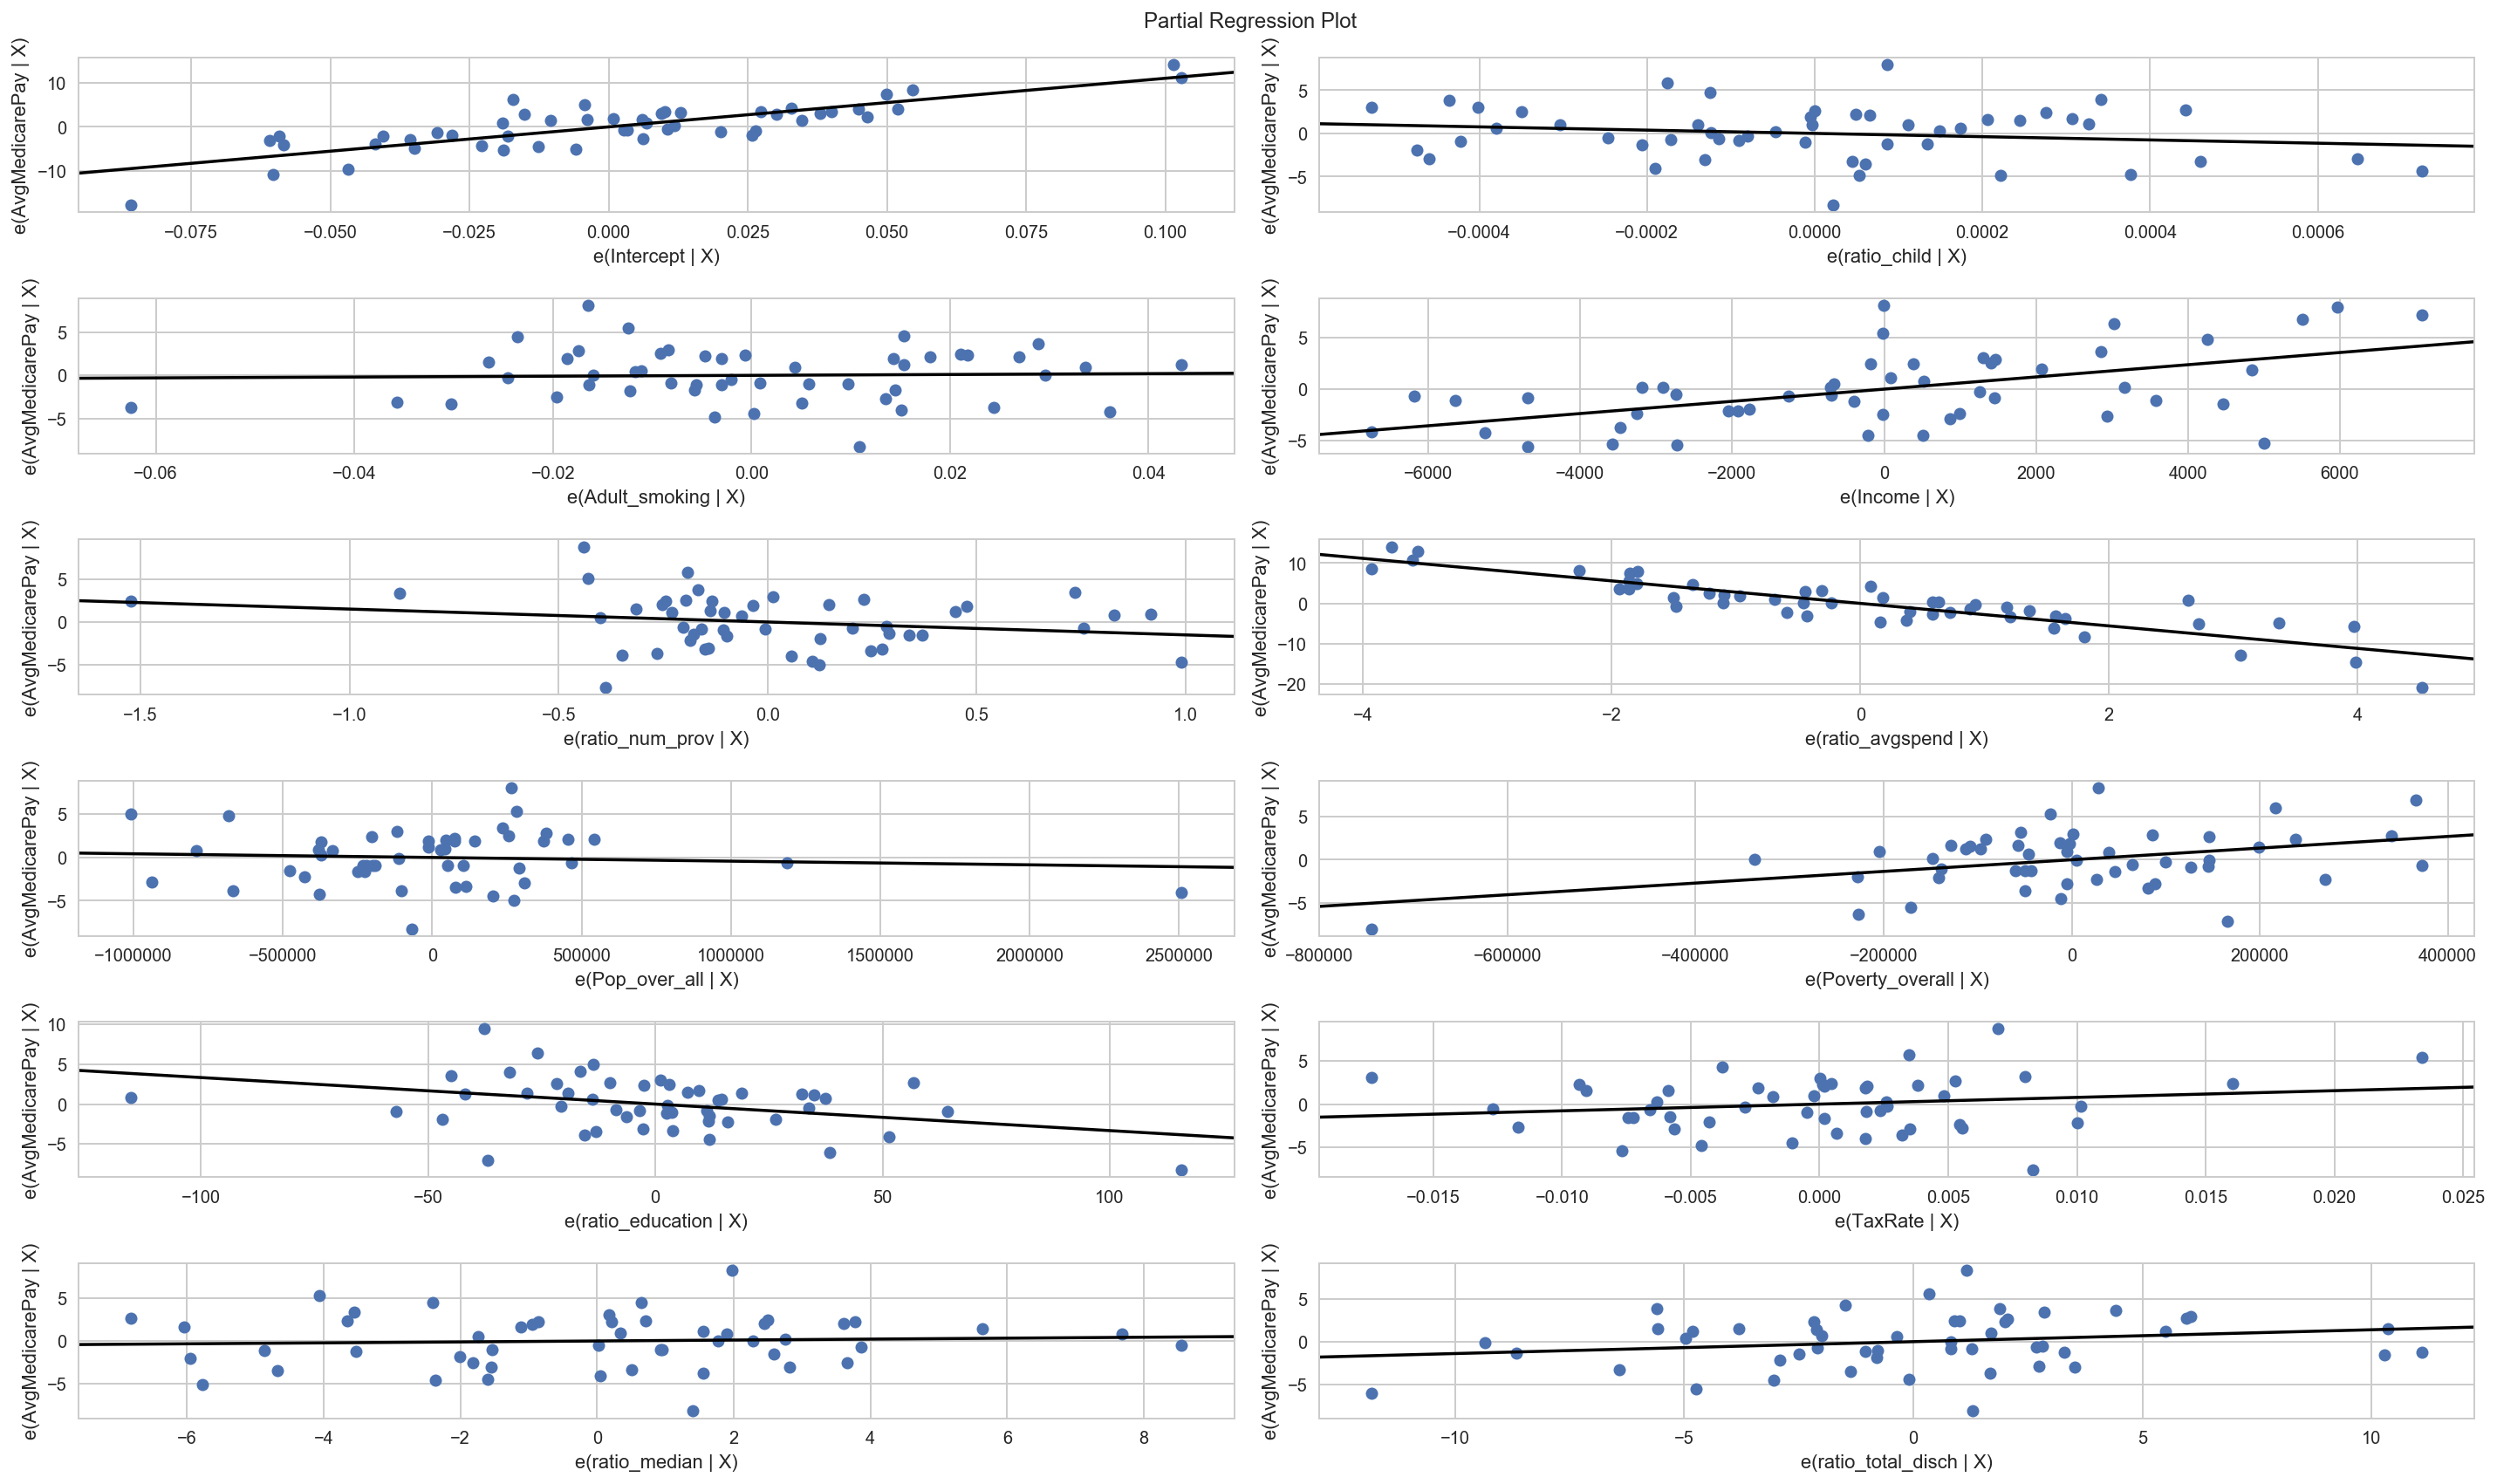

In [2912]:
# this produces our twelve partial regression plots
fig = plt.figure(figsize=(20,12))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)

### I am only going to try unsing one predictor variable here

In [2916]:
model6 = ols("AvgMedicarePay ~ Income", data=df_xx).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         AvgMedicarePay   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     57.73
Date:                Fri, 06 Apr 2018   Prob (F-statistic):           8.96e-10
Time:                        09:39:14   Log-Likelihood:                -181.02
No. Observations:                  50   AIC:                             366.0
Df Residuals:                      48   BIC:                             369.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.0061      8.102      2.963      0.005       7.715      40.297
Income         0.0011      0.000      7.598      0.000       0.001       0.001
==============================================================================
Omnibus:                        3.776   Durbin-Watson:                   2.164
Prob(Omnibus):                  0.151   Jarque-Bera (JB):                2.694
Skew:                           0.451   Prob(JB):                        0.260
Kurtosis:                       3.693   Cond. No.                     3.42e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.42e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

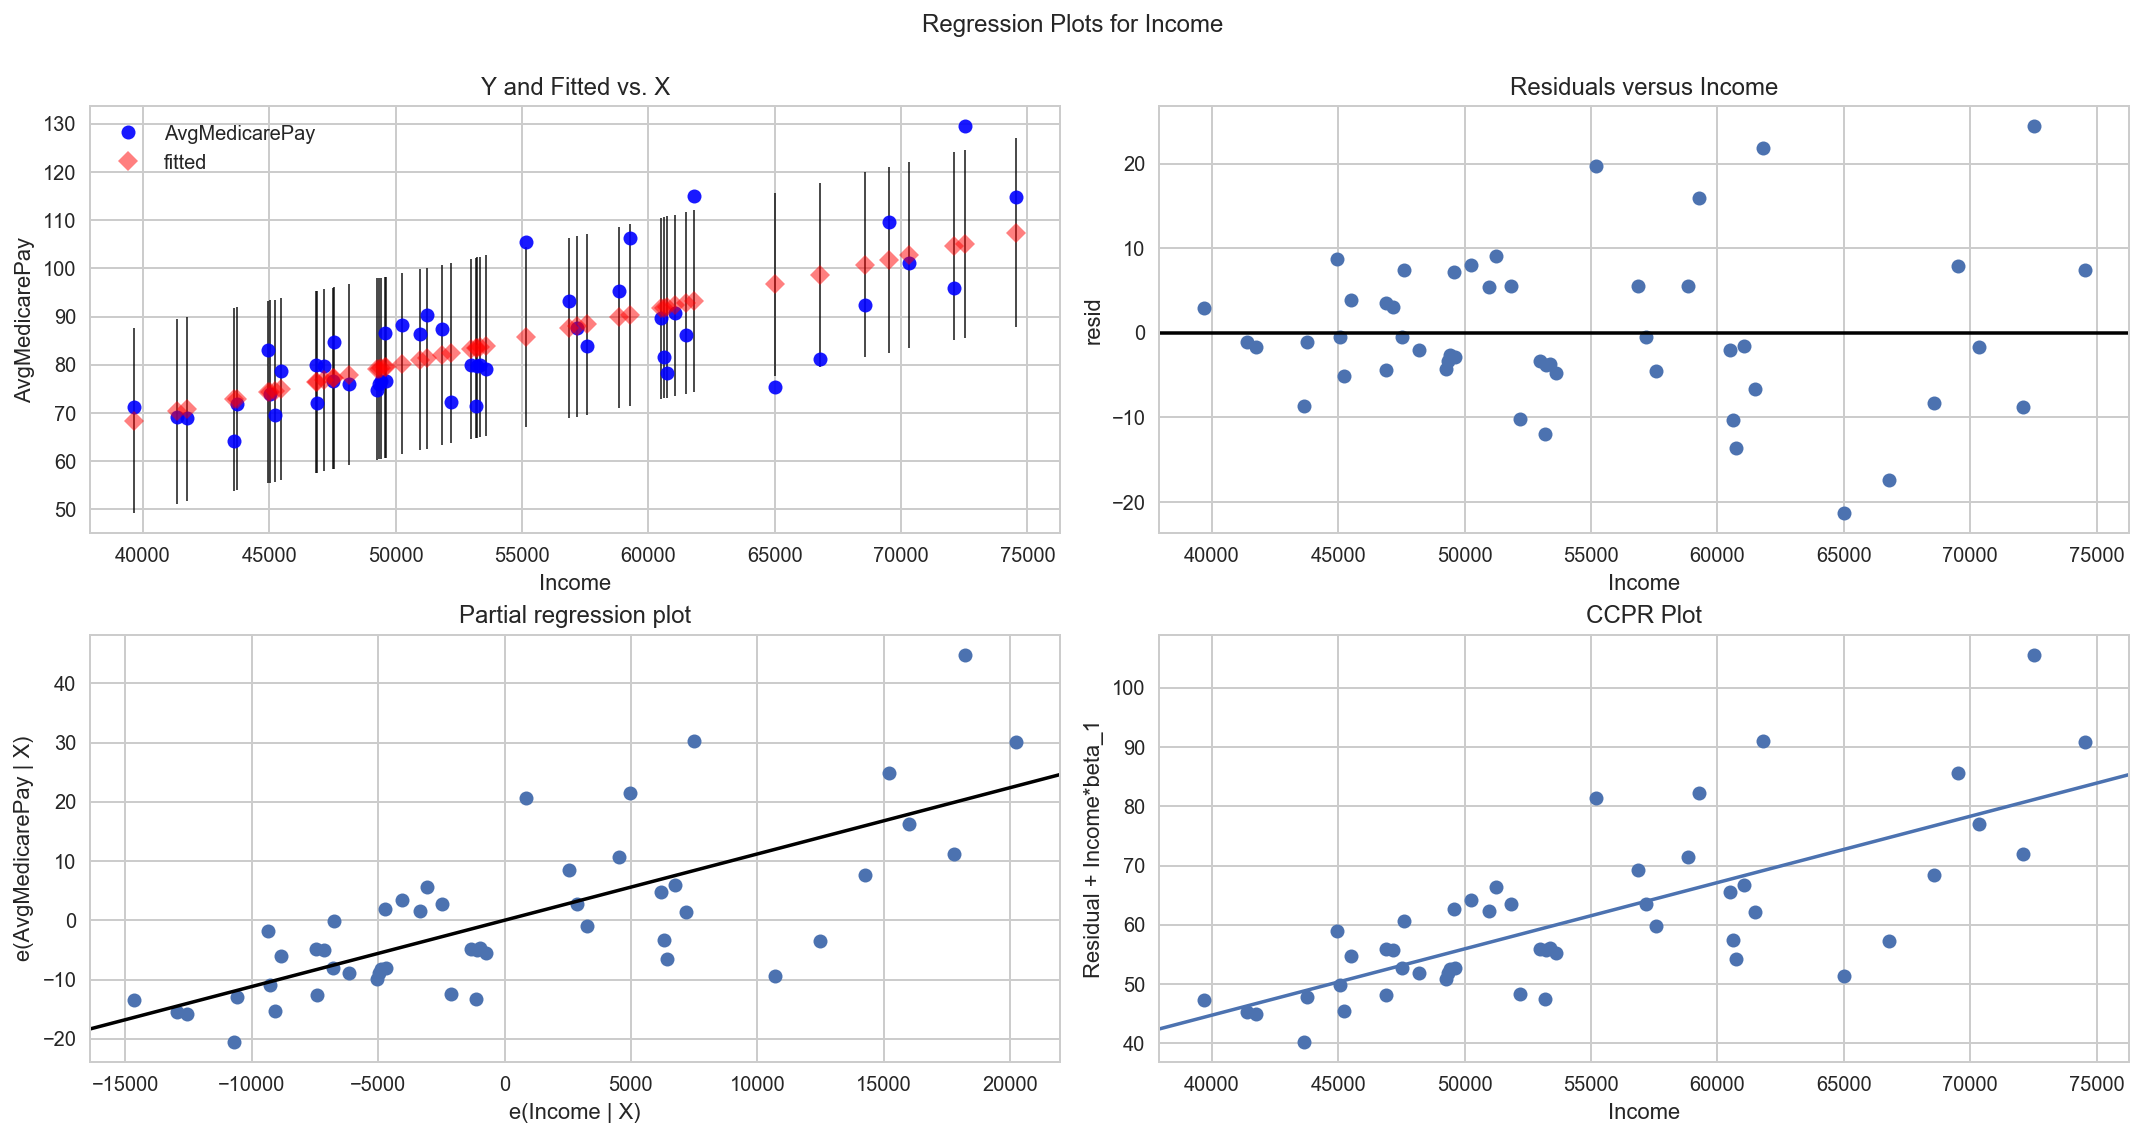

In [2917]:
# this produces our four regression plots for Income just want want to analyze income only for now
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model6, "Income", fig=fig)  

### USING PRINCIPAL COMPONENT ANALYSIS(PCA) TO ELIMINATE MULTICOLLINEARITY BETWEEN SELECTED FEATURES.
### Why would i want to do that?
##### . Because it transform original variable/features into new, "high-performance" features
##### . It Reduce the dimensionality of the data

In [2922]:
# Using PCA on the selected features.
X_PCA = XX
pca = PCA()
pca = pca.fit(X_PCA)

In [2923]:
# PCA Transformation
X_pca = pca.transform(X_PCA) 
X_features_pca = ['PC'+str(i+1) for i in range(pca.n_components_)]
features = pd.DataFrame(X_pca, columns=X_features_pca)

In [2924]:
features.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,-3.472412e+06,-444492.590980,5103.227908,8.428608,0.243096,0.949733,1.229336,-0.125066,-0.003934,-0.003613,0.000648
1,-4.464543e+06,-280246.172847,3185.261767,9.519668,-6.744070,0.304120,3.770313,-0.015493,0.006952,-0.008687,0.000460
2,-1.676659e+06,-561218.767334,-2612.673872,-5.438594,0.803179,1.502588,-0.566840,0.054998,-0.026527,-0.000216,0.000377
3,-1.782123e+06,459047.155552,20205.016551,141.798998,14.470300,2.437540,-0.184115,-0.549402,0.024654,0.006098,0.000725
4,-1.503764e+06,-152543.677046,5534.359907,6.020587,-0.994931,0.970791,1.291039,0.005818,-0.009788,-0.001192,0.000174


In [2925]:
# Adding the target column to PCA Components.
features['AvgMedicarePay'] = df_xx[['AvgMedicarePay']]

In [2926]:
features.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       'PC11', 'AvgMedicarePay'],
      dtype='object')

In [2927]:
model1 = ols("""AvgMedicarePay ~ PC1 
                                + PC2 
                                + PC3
                                + PC4 
                                + PC5
                                + PC6
                                + PC7
                                + PC8
                                + PC9
                                + PC10
                                + PC11
                                """, data=features).fit()

In [2928]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         AvgMedicarePay   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     64.75
Date:                Fri, 06 Apr 2018   Prob (F-statistic):           3.87e-21
Time:                        09:43:02   Log-Likelihood:                -126.19
No. Observations:                  50   AIC:                             276.4
Df Residuals:                      38   BIC:                             299.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     84.7655      0.490    173.096      0.000      83.774      85.757
PC1         2.649e-07   6.54e-08      4.053      0.000    1.33e-07    3.97e-07
PC2         1.255e-05    1.8e-06      6.959      0.000     8.9e-06    1.62e-05
PC3           -0.0015   7.23e-05    -20.345      0.000      -0.002      -0.001
PC4            0.0661      0.008      8.006      0.000       0.049       0.083
PC5            0.0017      0.091      0.019      0.985      -0.182       0.185
PC6           -0.1923      0.132     -1.454      0.154      -0.460       0.076
PC7            2.9551      0.233     12.702      0.000       2.484       3.426
PC8            1.7331      1.082      1.601      0.118      -0.458       3.924
PC9            7.7698     22.597      0.344      0.733     -37.976      53.515
PC10          94.2069     66.577      1.415      0.165     -40.572     228.985
PC11       -1888.7618   1719.923     -1.098      0.279   -5370.564    1593.040
==============================================================================
Omnibus:                        0.814   Durbin-Watson:                   1.689
Prob(Omnibus):                  0.666   Jarque-Bera (JB):                0.224
Skew:                          -0.041   Prob(JB):                        0.894
Kurtosis:                       3.318   Cond. No.                     2.63e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.63e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [2931]:
df_corr = df_xx[['ratio_child', 'Adult_smoking','Income', 'ratio_num_prov', 'ratio_avgspend', 'Pop_over_all','Poverty_overall', 
        'ratio_education', 'TaxRate', 'ratio_median','ratio_total_disch']]
df_corr['AvgMedicarePay'] = df_xx['AvgMedicarePay']

C:\Users\nonob\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


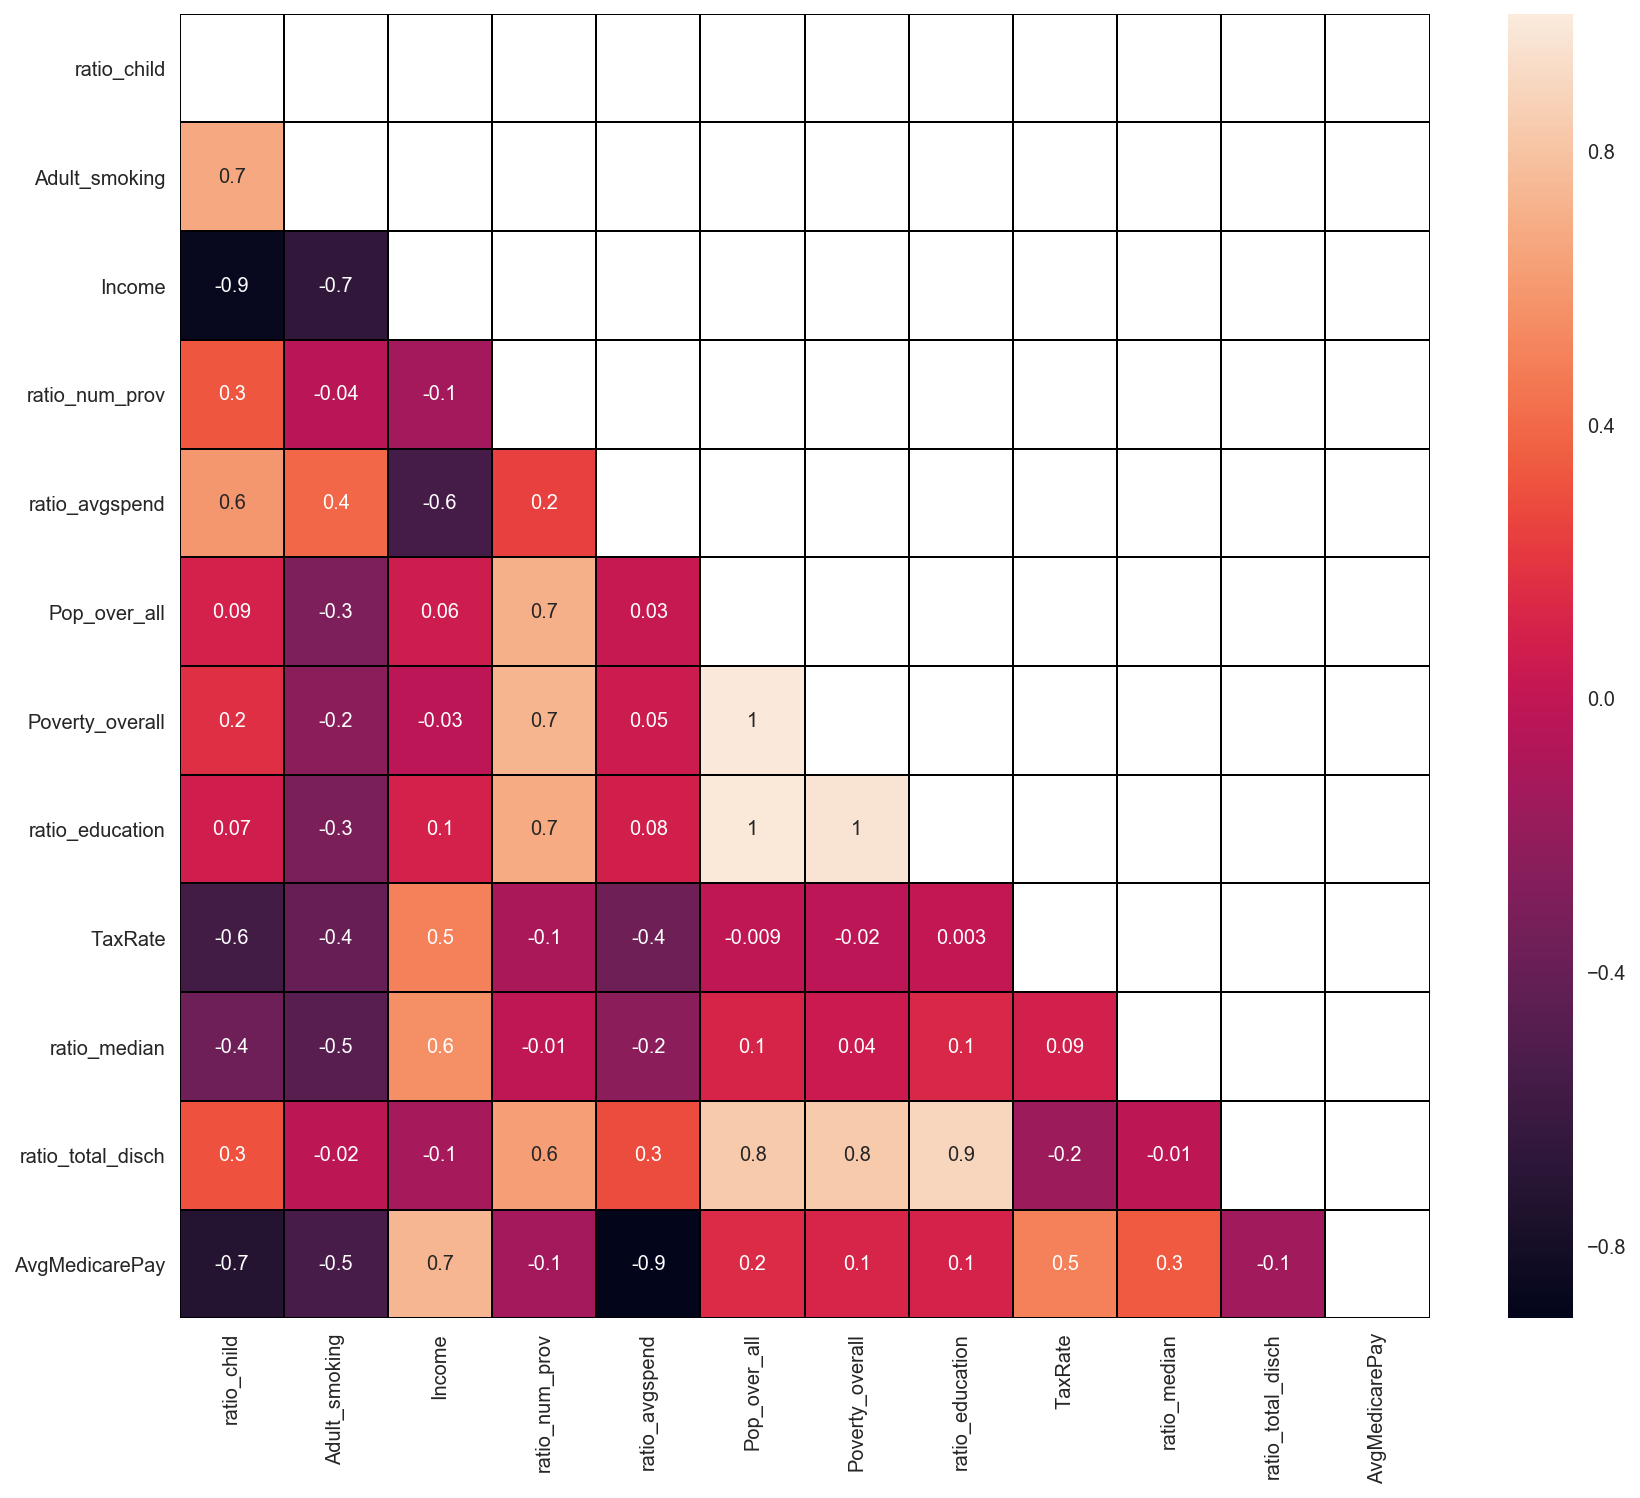

In [2932]:
# Graphical representattion of the correlation matrix using Heat Map.
mask = np.zeros_like(df_corr.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize = (14, 12))
sns.heatmap(df_corr.corr(), annot=True, linewidths = 0.5, robust = False, linecolor = 'black', fmt = '.1g', 
            ax=ax, mask=mask)

In [2934]:
# Adding the State column which was dropped before due to it's dtype
features['State'] = df_xx[['State']]

In [2935]:
# previewing the dataframe
features.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,AvgMedicarePay,State
0,-3.472412e+06,-444492.590980,5103.227908,8.428608,0.243096,0.949733,1.229336,-0.125066,-0.003934,-0.003613,0.000648,71.241758,Mississippi
1,-4.464543e+06,-280246.172847,3185.261767,9.519668,-6.744070,0.304120,3.770313,-0.015493,0.006952,-0.008687,0.000460,83.001114,New Mexico
2,-1.676659e+06,-561218.767334,-2612.673872,-5.438594,0.803179,1.502588,-0.566840,0.054998,-0.026527,-0.000216,0.000377,73.877046,Louisiana
3,-1.782123e+06,459047.155552,20205.016551,141.798998,14.470300,2.437540,-0.184115,-0.549402,0.024654,0.006098,0.000725,64.180071,Alabama
4,-1.503764e+06,-152543.677046,5534.359907,6.020587,-0.994931,0.970791,1.291039,0.005818,-0.009788,-0.001192,0.000174,78.763315,South Carolina


In [3243]:
# subsetting dataframe for future modeling use
y = features.AvgMedicarePay
Xi = features.iloc[:,:11]

### Using a RandomForest Regressor model.  passing the model  through a pipeline and runing the pipeline through a Gridsearching  which is best way for hyperparameter tuning

In [2999]:
# subseting dataframe into target and predictor variable.
y01 = df_xx.AvgMedicarePay
# this means select all variable/features name that is not AverageMedicarePay and State
X01 = df_xx[['ratio_child', 'Adult_smoking','Income', 'ratio_num_prov', 'ratio_avgspend', 'Pop_over_all','Poverty_overall', 
        'ratio_education', 'TaxRate', 'ratio_median','ratio_total_disch']]

In [3000]:
X_train01, X_test01, y_train01, y_test01 = train_test_split(X01, y01, test_size=0.50)
print(X_train01.shape, y_train01.shape)
print(X_test01.shape, y_test01.shape)

(25, 11) (25,)
(25, 11) (25,)


In [3001]:
# Creating a model for Pipeline
model = Pipeline([
    ('Standardization', StandardScaler()),
    ('RandomForestRegressor', RandomForestRegressor())
    ])

In [3002]:
# Dictionary parameters for Randon Forest Regressor in the GridSearch.

param = {'RandomForestRegressor__n_estimators': [8, 16, 20],
         'RandomForestRegressor__criterion' : ['mse', 'mae'],
         'RandomForestRegressor__n_jobs' : [-1, 1]
         }

In [3003]:
# Running the pipeline through a GridSearch.
grid = GridSearchCV(model, param_grid = param, verbose=1)
grid.fit(X_train01, y_train01)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    6.5s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('Standardization', StandardScaler(copy=True, with_mean=True, with_std=True)), ('RandomForestRegressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_dec...imators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'RandomForestRegressor__n_estimators': [8, 16, 20], 'RandomForestRegressor__criterion': ['mse', 'mae'], 'RandomForestRegressor__n_jobs': [-1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [3004]:
# Best Score from the Random Forest Regressor 
grid.best_score_

0.55369400370653099

In [3005]:
# Best parameters from the Random Forest Regressor 
grid.best_params_

{'RandomForestRegressor__criterion': 'mae',
 'RandomForestRegressor__n_estimators': 16,
 'RandomForestRegressor__n_jobs': -1}

In [3006]:
# Best Estimator score from the Random Forest Regressor 
grid.best_estimator_.score(X_test01, y_test01)

0.83957448377209698

### Using a RandomForest Regressor model. using all features but AvgMedicarePay as predictors and  splitting dataset into train/test split of 60/40. we will also identify these features/predictors base on their individual performance towards predicting the target variable

In [602]:
# subseting dataframe into target and predictor variable.
y0 = df_xx.AvgMedicarePay
# this means select all variable/features name that is not AverageMedicarePay and State
X0 = df_xx[['ratio_child', 'Adult_smoking','Income', 'ratio_num_prov', 'ratio_avgspend', 'Pop_over_all','Poverty_overall', 
        'ratio_education', 'TaxRate', 'ratio_median','ratio_total_disch']]

In [603]:
# splitting data set into train and test set
X_train0, X_test0, y_train0, y_test0 = train_test_split(X0, y0, test_size=0.40)
print(X_train0.shape, y_train0.shape)
print(X_test0.shape, y_test0.shape)

(30, 11) (30,)
(20, 11) (20,)


In [604]:
# RandomForest Model
rnd = RandomForestRegressor(n_estimators=20, criterion = 'mae', n_jobs = -1)

In [605]:
# Training the model
rnd.fit(X_train0, y_train0)

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [606]:
# Model prediction
pred_new = rnd.predict(X_test0)

In [607]:
# R2 score
r2_score(y_test0, pred_new)

0.85043428160704471

In [608]:
# Creating a DataFrame 
Feature = pd.DataFrame(columns = ['Features', 'Score'])

In [609]:
# Assigning values to the Selected Features column
Feature['Features'] = X_train0.columns

In [610]:
# creating a dataframe to house true values and their predictions
predict = pd.DataFrame(columns = ['True_value', 'Prediction'])

In [611]:
# asigning observations to a column in the newly created dataframe
predict['True_value'] = y_test0

In [612]:
# asigning observations to a column in the newly created dataframe
predict['Prediction'] = pred_new

In [613]:
# asigning observations to a column in the newly created dataframe
predict['State'] = df_xx['State']

In [614]:
predict = predict[['State','True_value','Prediction']].reset_index(drop=True)

In [615]:
# prediction dataframe
predict.head()

,State,True_value,Prediction
0,Illinois,83.852827,78.909874
1,Wisconsin,80.025979,79.306122
2,Nebraska,79.926273,79.437262
3,South Dakota,86.411621,90.109248
4,Maryland,114.801218,108.343713


In [623]:
# write out to csv
predict.to_csv('../datasets/predict.csv', index=False)

Text(0.5,1,'Medicare spending prediction using RandomForest Regressor')

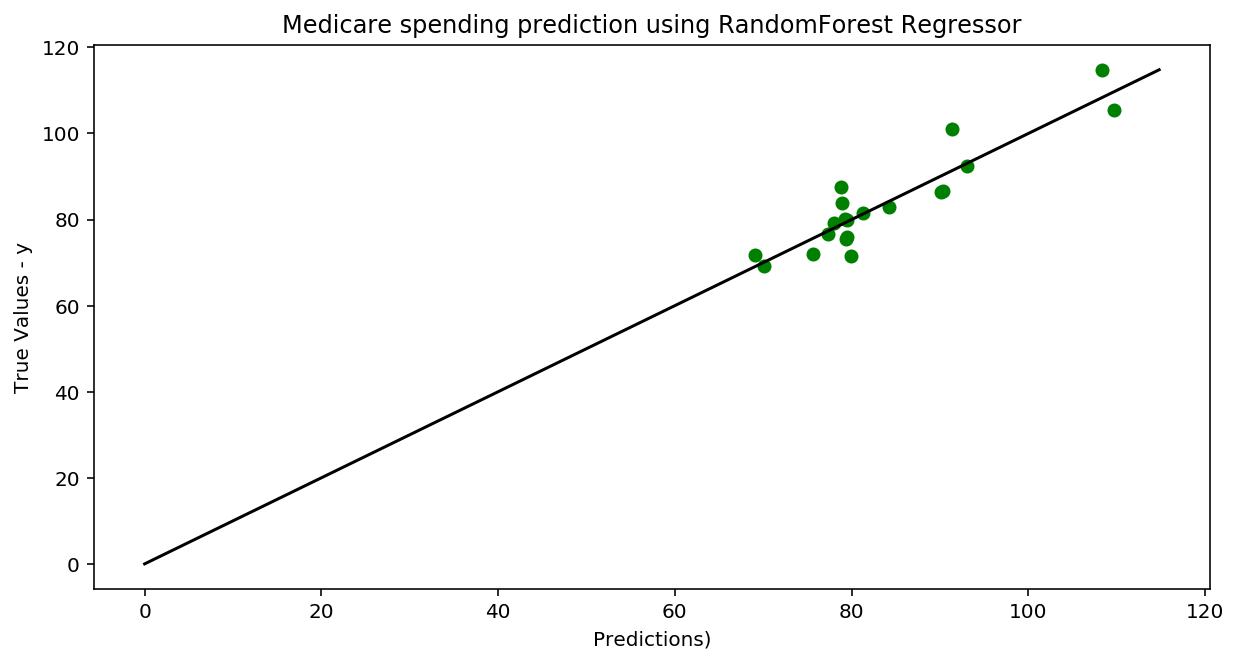

In [616]:
# Plot showing the True value and the  RandomForestRegressor predictions.

# create a figure
fig = plt.figure(figsize=(10,5))
# get the axis of that figure
ax = plt.gca()

# plot a scatter plot on it with our data
ax.scatter(predict['Prediction'], predict['True_value'], c='g')
plt.plot([0, np.max(predict['True_value'])], [0, np.max(predict['True_value'])], c = 'black')

    
ax.set_xlabel('Predictions)')
ax.set_ylabel('True Values - y')
ax.set_title('Medicare spending prediction using RandomForest Regressor')

In [617]:
# Feature importance
Feature['Score']= rnd.feature_importances_

In [618]:
# resetting index
Feature = Feature.reset_index(drop=True)

In [635]:
# feature dataframe sorted by score
Feature.sort_values(by='Score',ascending=False).reset_index(drop=True).head(6)

,Features,Score
0,ratio_avgspend,0.493808
1,TaxRate,0.078212
2,ratio_child,0.076643
3,Income,0.075114
4,Adult_smoking,0.073015
5,ratio_num_prov,0.068048


Text(0.5,0,'Feature importance')

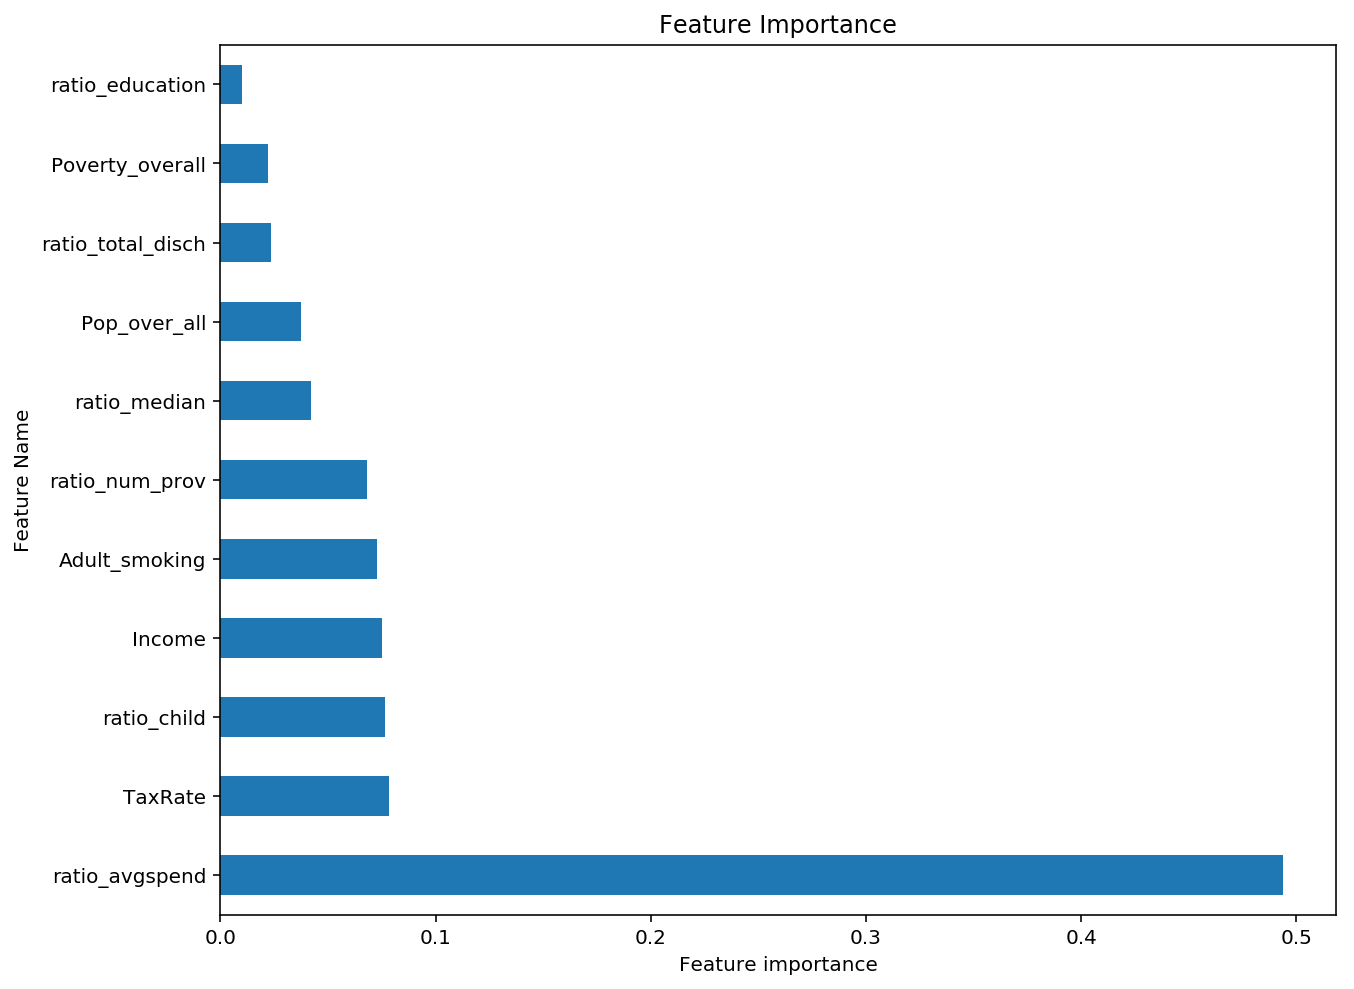

In [621]:
# Horizontal bar plot of Fetures and their Performance.
fig, ax = plt.subplots(figsize=(10,8))
Feature.groupby('Features')['Score'].mean().sort_values(ascending=False).plot(kind='barH', 
                                                                    ax=ax, title='Feature Importance')
plt.ylabel('Feature Name')
plt.xlabel('Feature importance')

## Base on this model prediction and feature importances we will visually try to confirm if this result corresponse in any way below. just to see their influences on medicare pricing

### Below graph is a Horizontal bar plot showing states with their respective Average medicare cost 

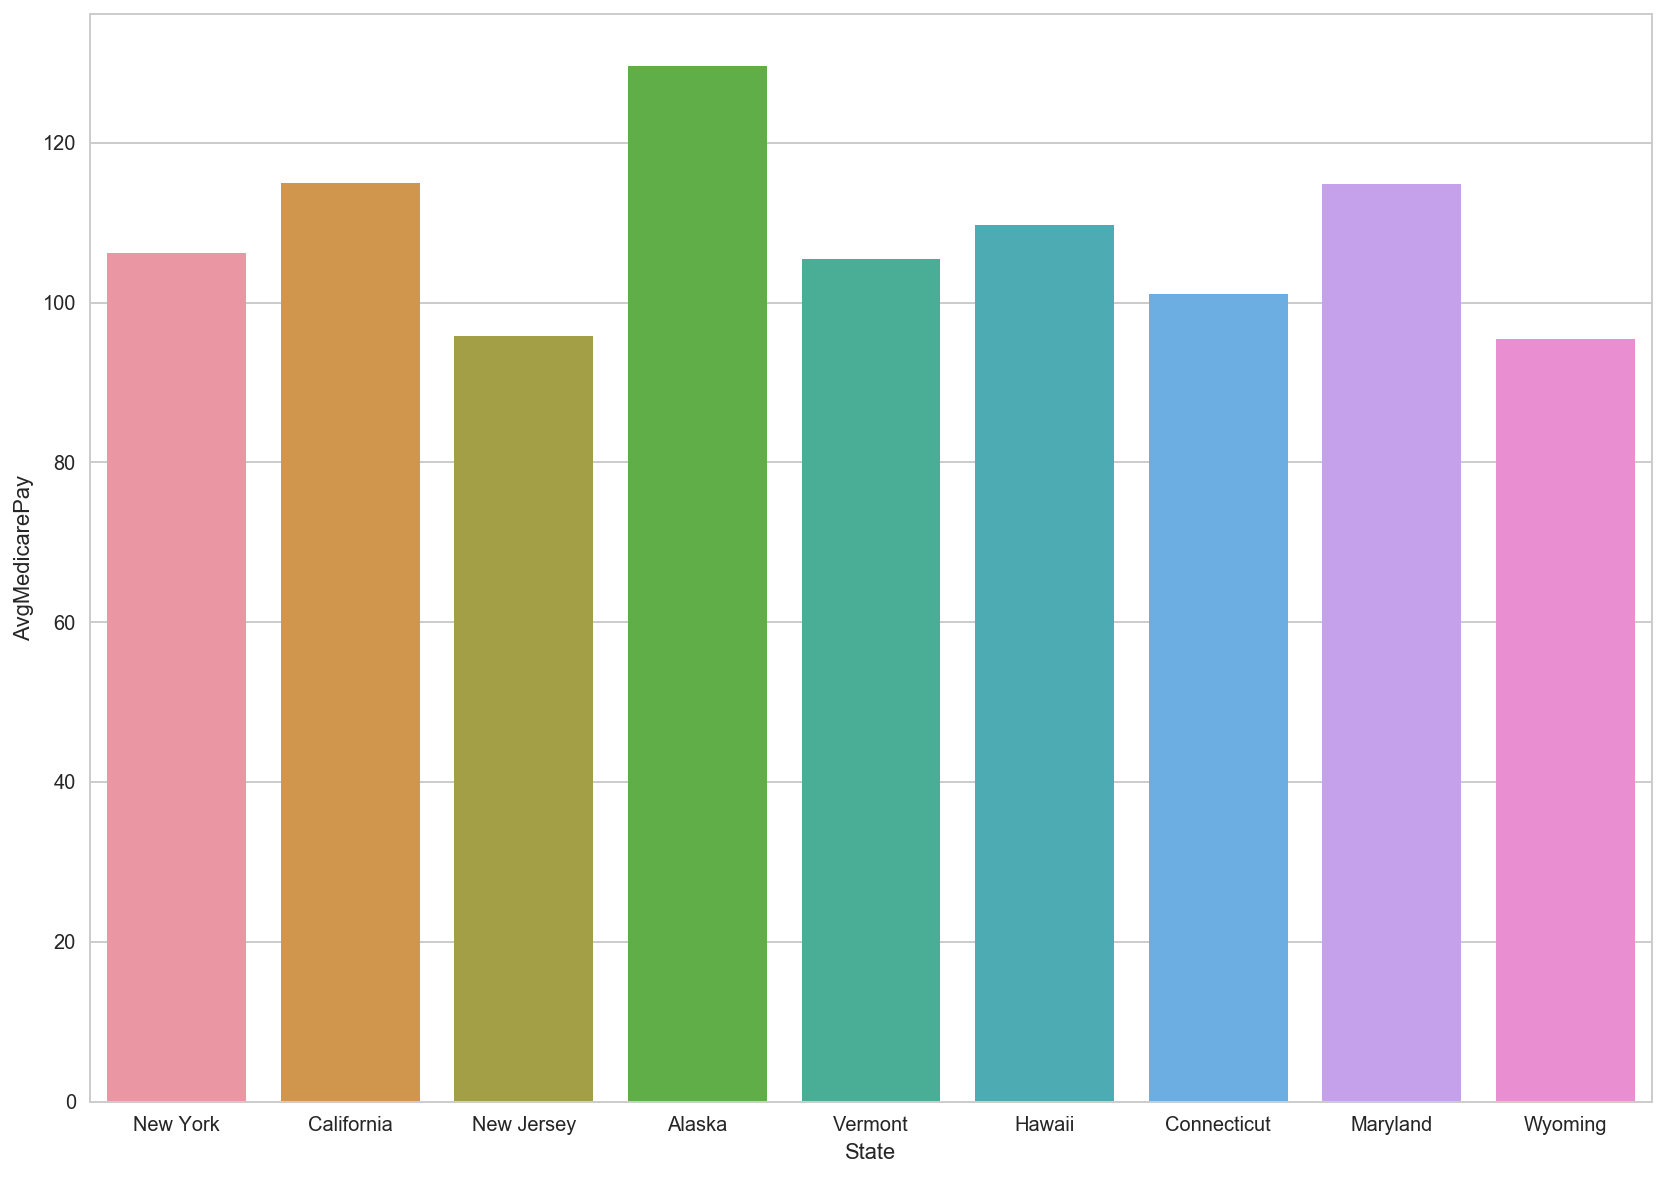

In [3099]:
# States with the most Medicare payment
fig, ax = plt.subplots(figsize=(14,10))
sns.barplot(x='State', y='AvgMedicarePay', data=df_xx[df_xx["AvgMedicarePay"] >= 95],  ax=ax)

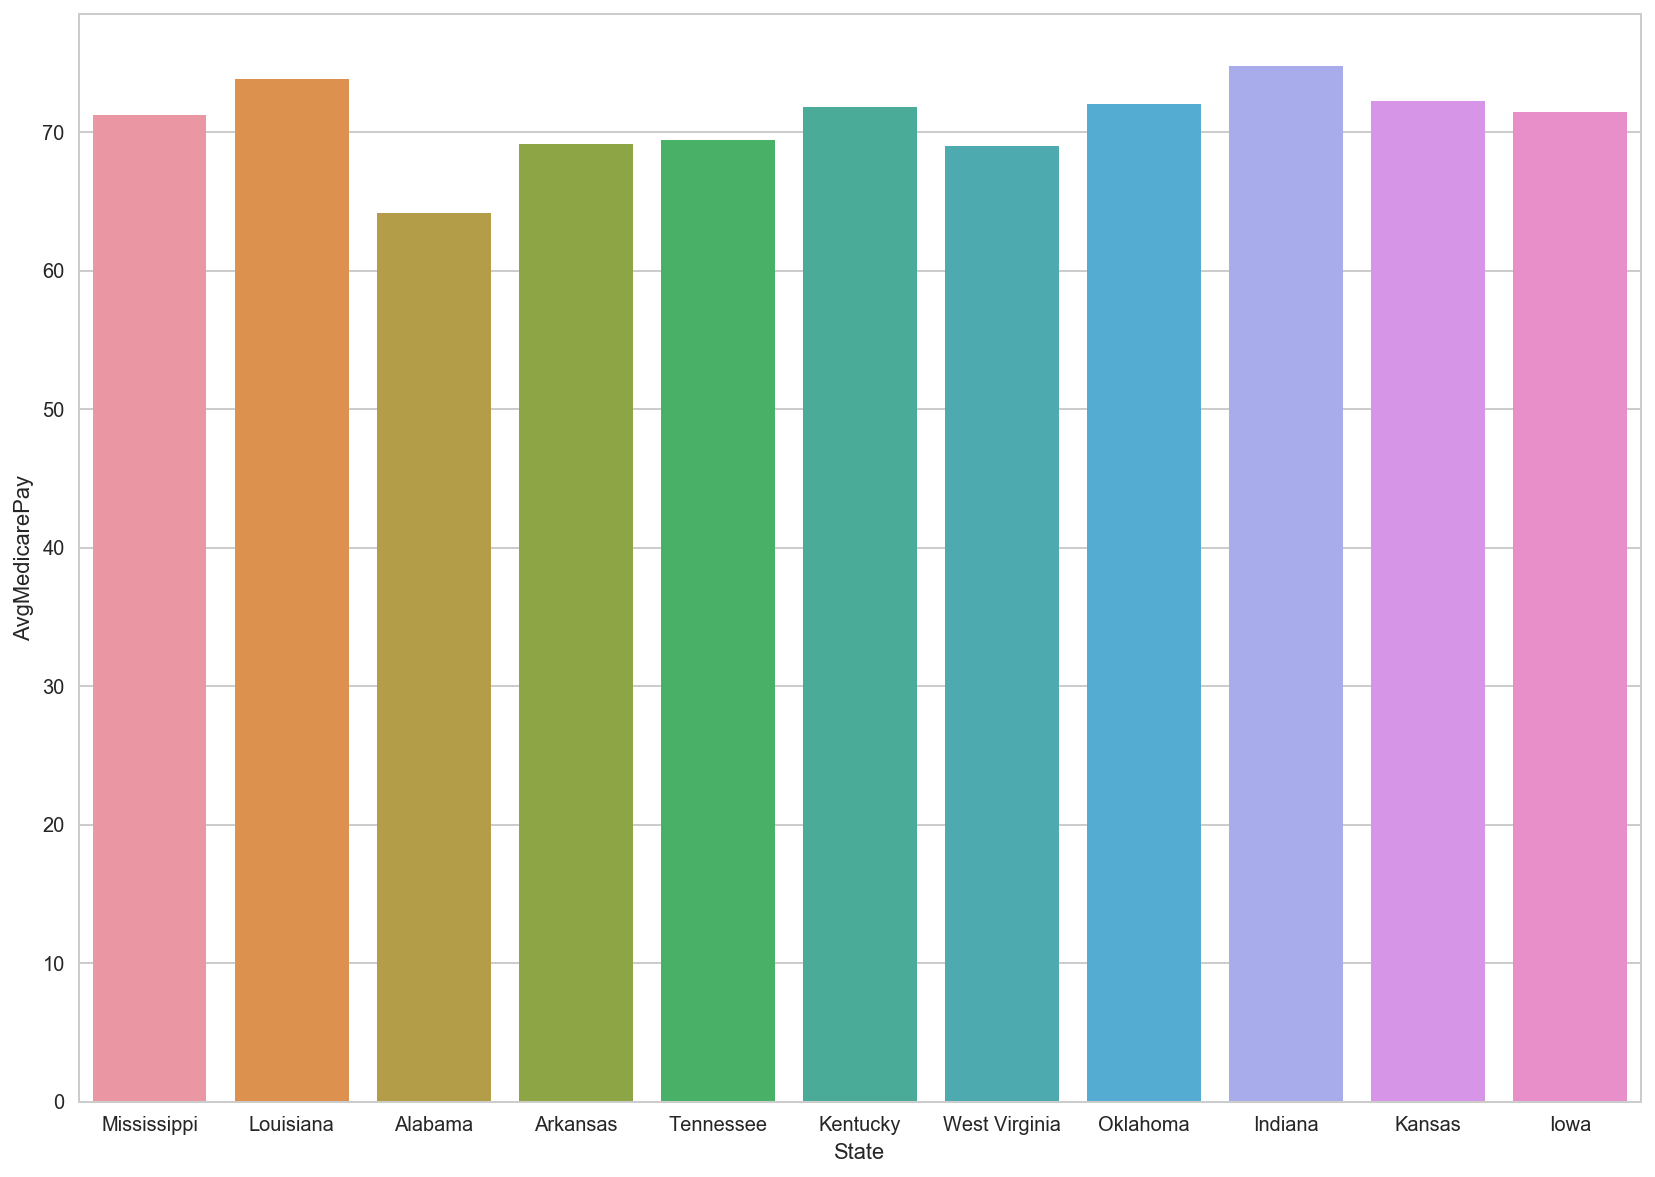

In [3100]:
# States with lower medicare payment
fig, ax = plt.subplots(figsize=(14,10))  
sns.barplot(x='State', y='AvgMedicarePay', data=df_xx[df_x["AvgMedicarePay"] <= 75],  ax=ax)

Text(0.5,0,'State name')

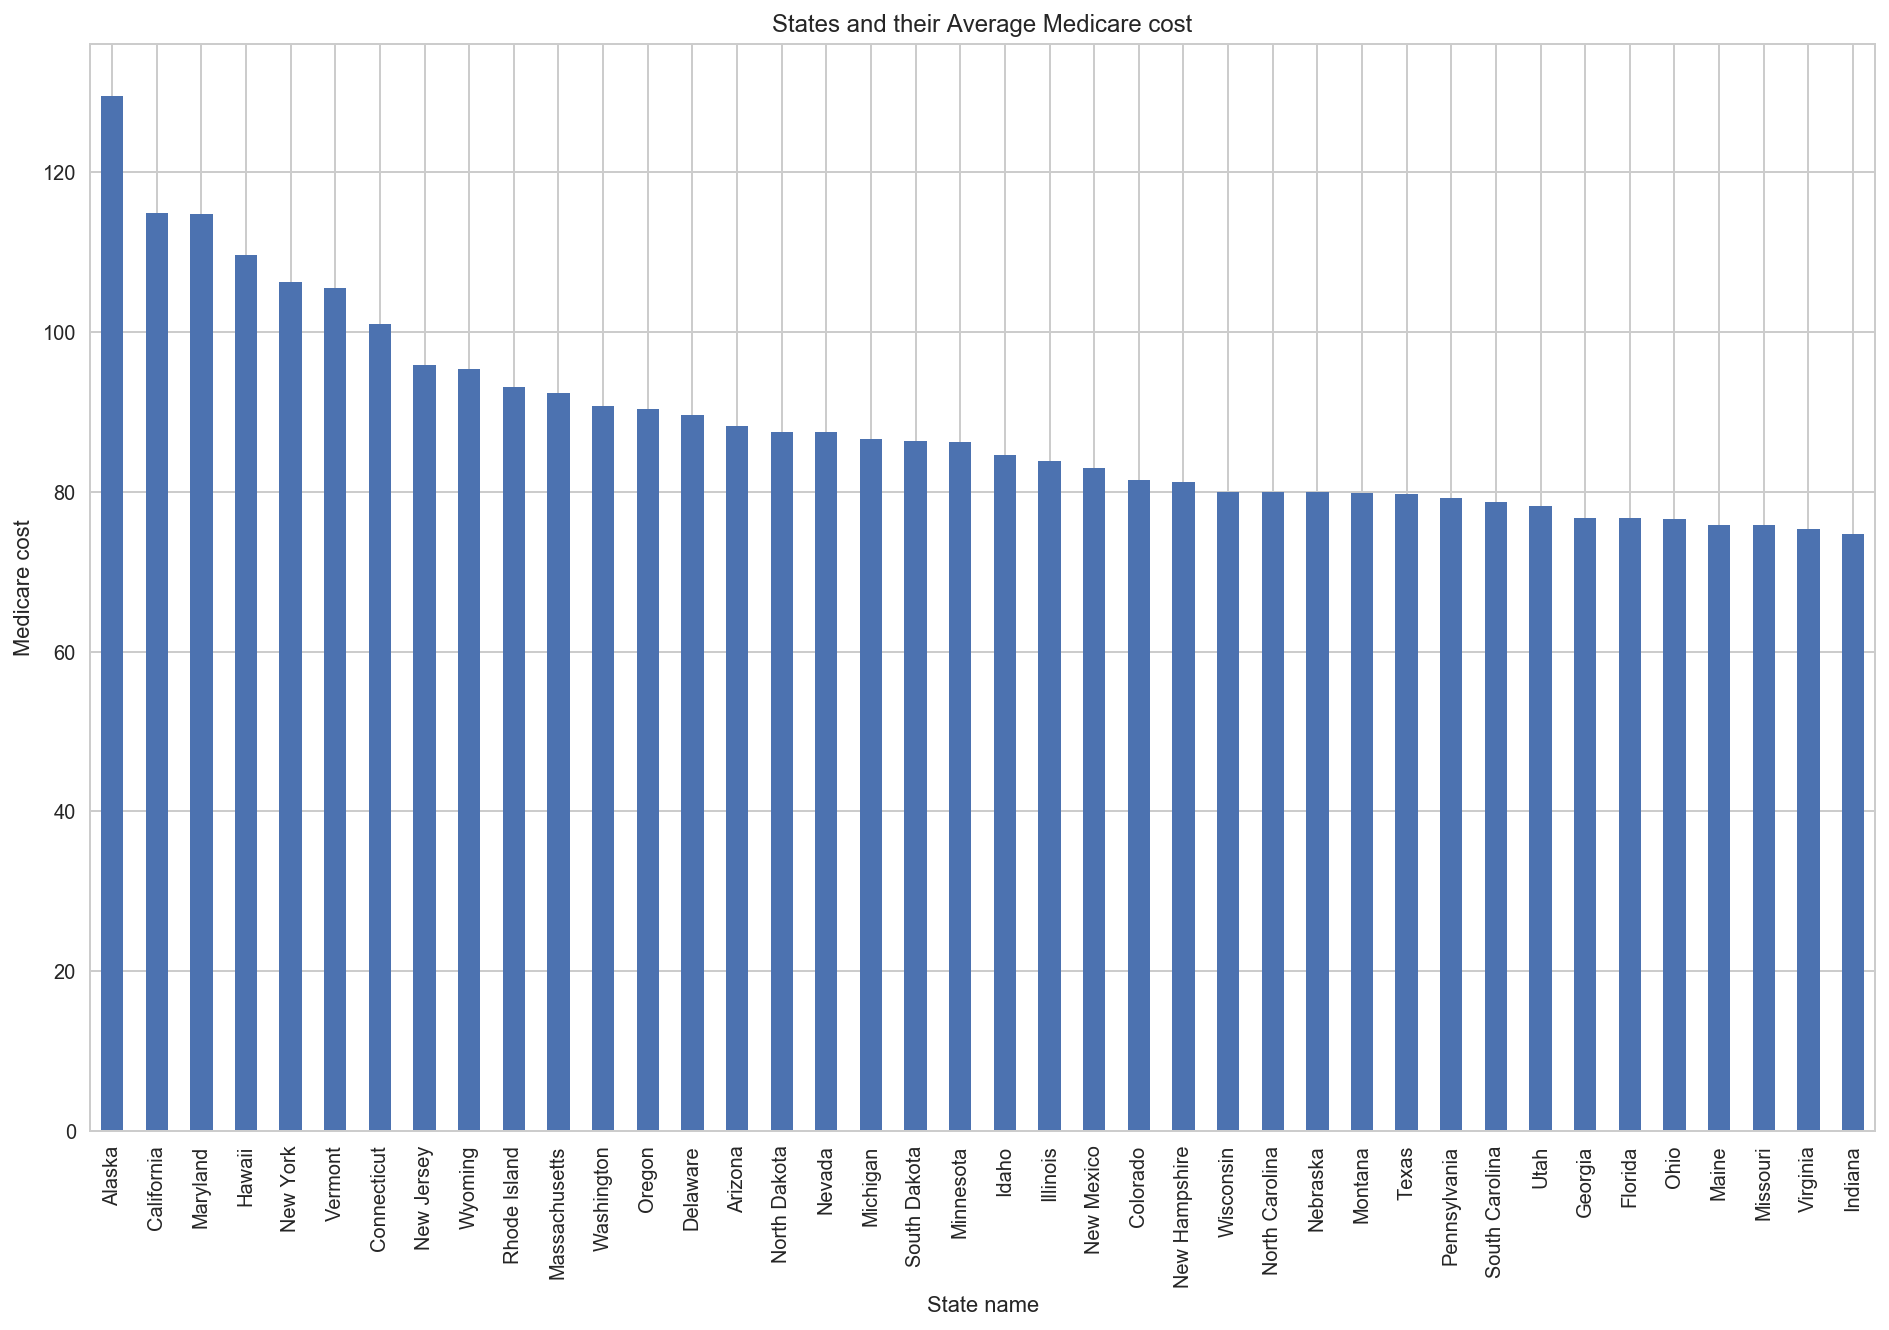

In [3101]:
# Horizontal bar plot of showing states with the most Medicare cost
fig, ax = plt.subplots(figsize=(16,10))
df_xx.groupby('State')['AvgMedicarePay'].first().sort_values(ascending=False).head(40).plot(kind='bar', 
                                                                    ax=ax, title='States and their Average Medicare cost')
plt.ylabel('Medicare cost')
plt.xlabel('State name')

### Below graph is a Horizontal bar plot showing states with their respective Median Hous value 

Text(0.5,0,'Average spending per episode')

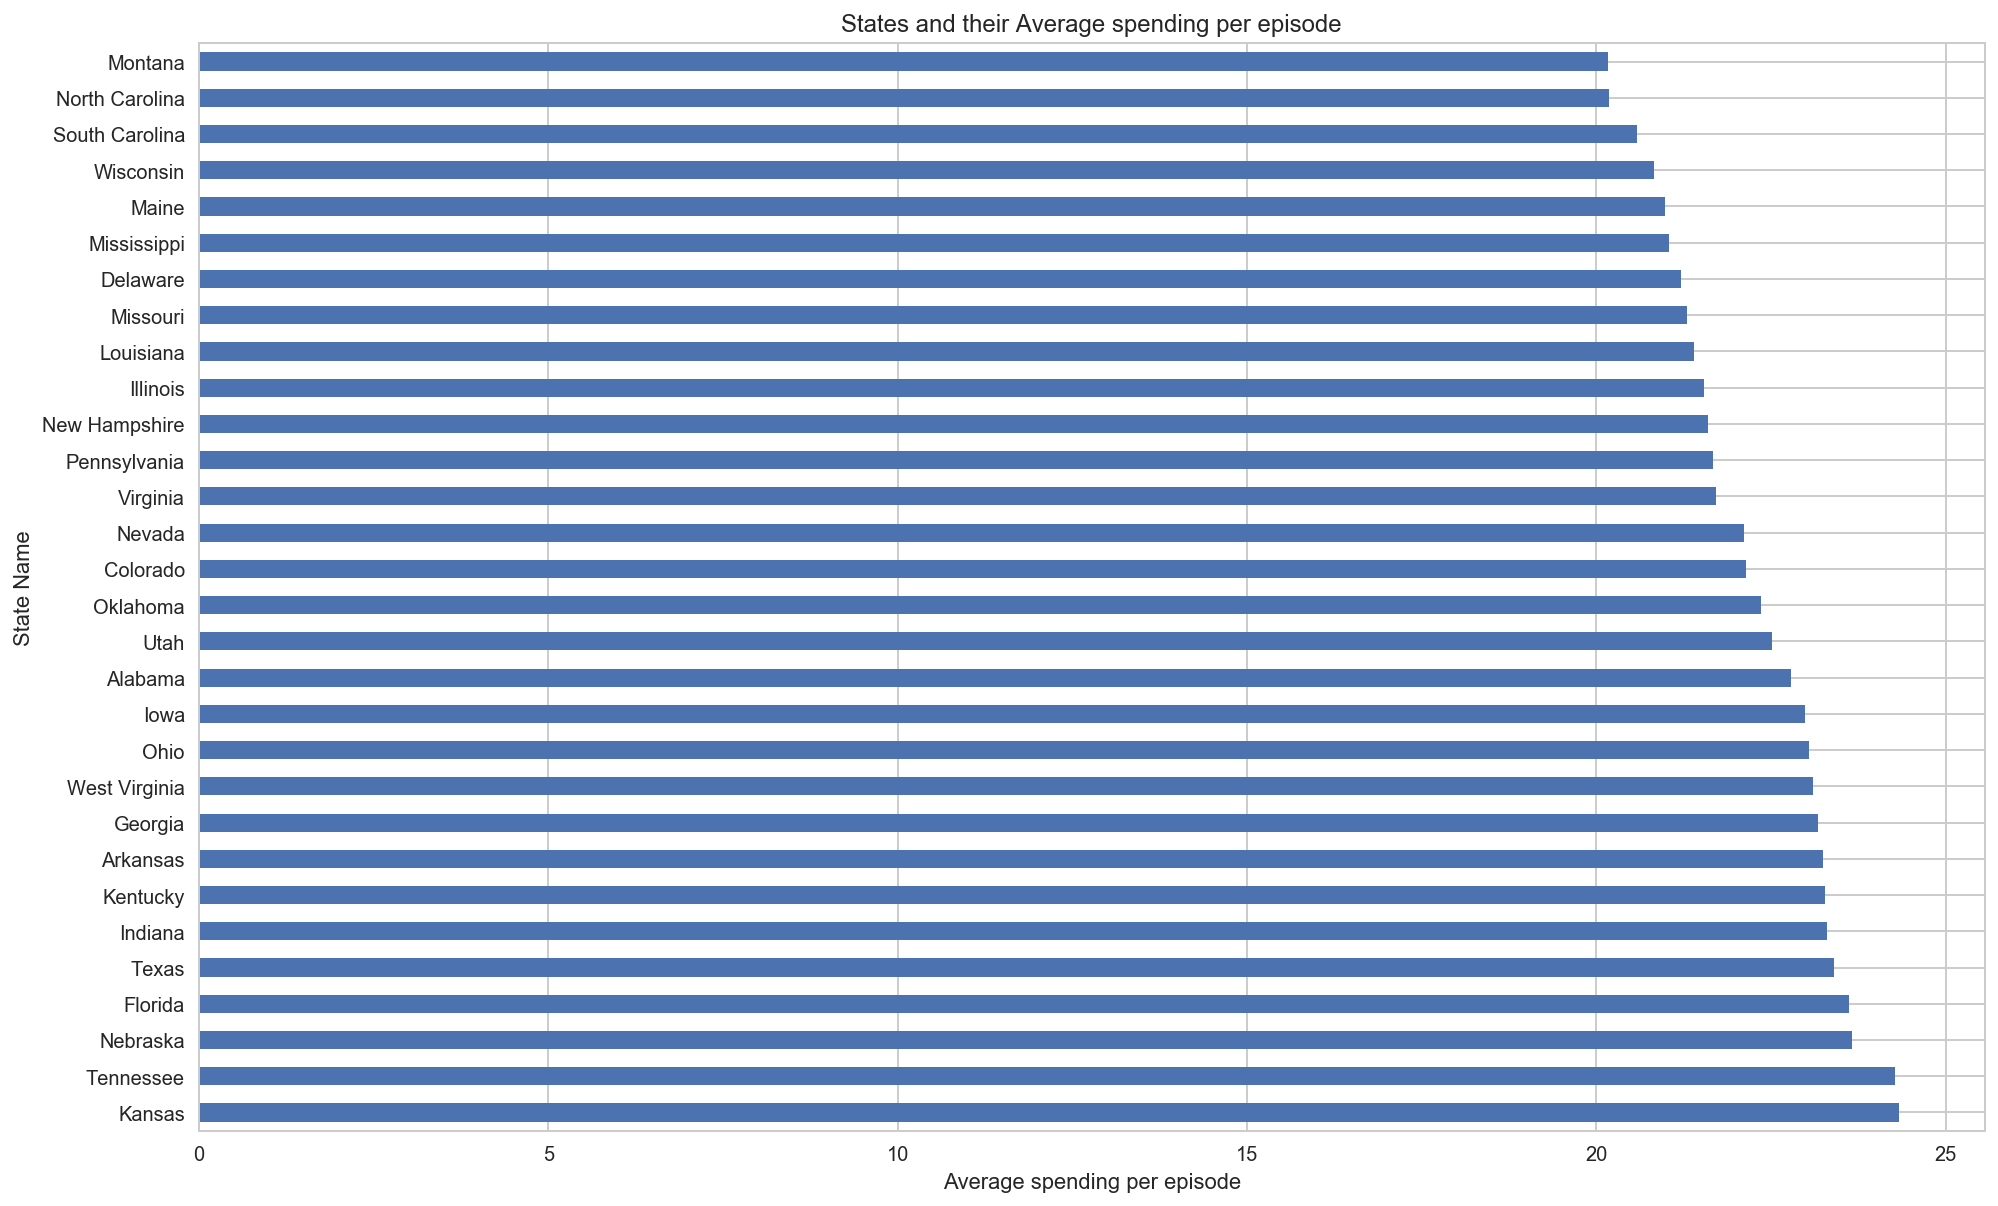

In [3180]:
# Horizontal bar plot showing states with their respective average spending per episode
fig, ax = plt.subplots(figsize=(16,10))
df_xx.groupby('State')['ratio_avgspend'].first().sort_values(ascending=False).head(30).plot(kind='barH', 
                                                                    ax=ax, title='States and their Average spending per episode')
plt.ylabel('State Name')
plt.xlabel('Average spending per episode')

### Below graph is a Horizontal bar plot showing states with their respective Income 

Text(0.5,0,'Income')

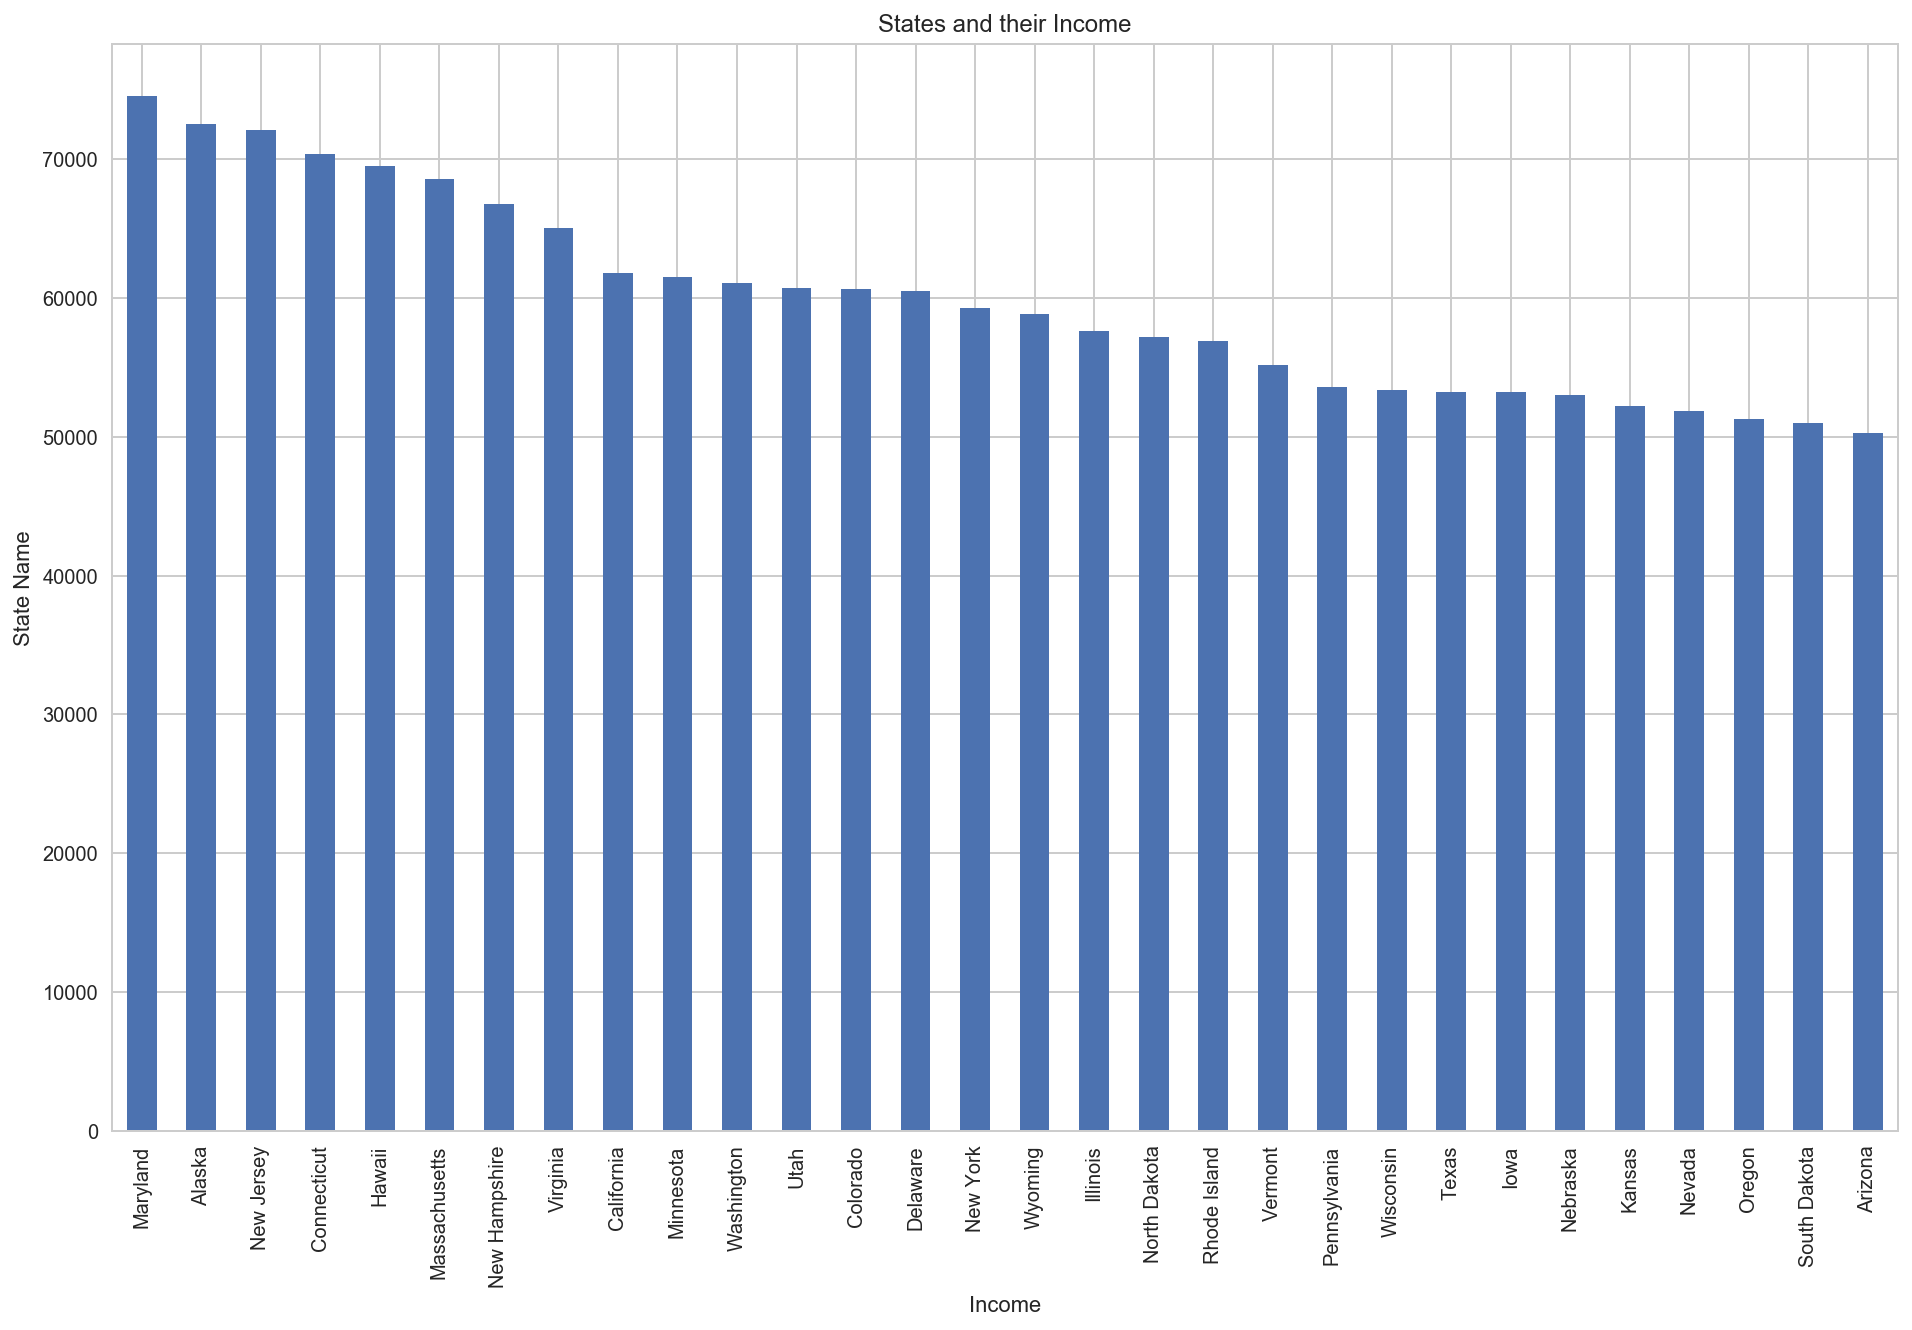

In [3103]:
# Horizontal bar plot showing states with their respective Income
fig, ax = plt.subplots(figsize=(16,10))
df_xx.groupby('State')['Income'].first().sort_values(ascending=False).head(30).plot(kind='bar',
                                                                                   ax=ax, title='States and their Income')
plt.ylabel('State Name')
plt.xlabel('Income')

#### Using stats model (OLS) with all features but AvgMedicarePay as predictors and AvgMedicare as target . We will have to manually add intercept here because stats model requires that

In [3181]:
# subseting dataframe into target and predictor variable.
y = df_xx.AvgMedicarePay
# this means select all variable/features name that is not AverageMedicarePay and State
X = df_xx[['ratio_child', 'Adult_smoking','Income', 'ratio_num_prov', 'ratio_avgspend', 'Pop_over_all','Poverty_overall', 
        'ratio_education', 'TaxRate', 'ratio_median','ratio_total_disch']]
# manually add the intercept column
X = np.concatenate([X, np.ones((X.shape[0], 1))], axis=1)

In [3182]:
# stats model with all features but AvgmedicarePay as predictors
model = sm.OLS(y, X)
model = model.fit() 

In [3183]:
# making predictions with ols model
pred = model.predict(X)

In [3184]:
# creating a dataframe to house model predictions
prediction = pd.DataFrame()

In [3185]:
# asigning a true value of target column
prediction['True_value'] = y

In [3186]:
# asigning prediction column
prediction['predicted'] = pred

In [3187]:
prediction['State'] = df_x['State']

In [3188]:
# previewing the dataframe having the true value and it's predictions
prediction = prediction[['State','True_value','predicted']]
prediction.head()

,State,True_value,predicted
0,Mississippi,71.241758,72.955454
1,New Mexico,83.001114,85.420445
2,Louisiana,73.877046,77.958422
3,Alabama,64.180071,67.150857
4,South Carolina,78.763315,77.827008


Text(0.5,1,'Medicare spending prediction using linear regression')

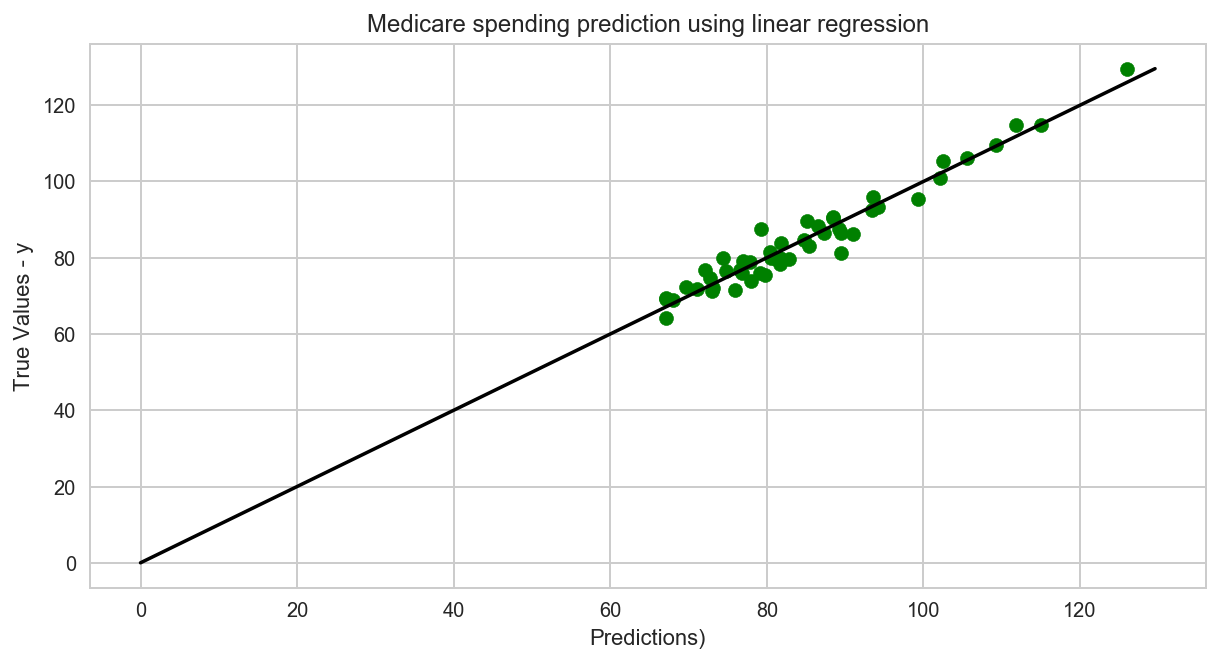

In [3189]:
# Plot showing the True value and the  Ordinary Least Squares (OLS) model predictions.
# create a figure
fig = plt.figure(figsize=(10,5))
# get the axis of that figure
ax = plt.gca()

# plot a scatter plot on it with our data
ax.scatter(prediction['predicted'], prediction['True_value'], c='g')
plt.plot([0, np.max(prediction['True_value'])], [0, np.max(prediction['True_value'])], c = 'black')

    
ax.set_xlabel('Predictions)')
ax.set_ylabel('True Values - y')
ax.set_title('Medicare spending prediction using linear regression')

### Using  Cross-Validation

In [625]:
# subseting dataframe into target and predictor variable.
y2i = df_xx.AvgMedicarePay
# this means select all variable/features name that is not AverageMedicarePay and State
X2i = df_xx[['ratio_child', 'Adult_smoking','Income', 'ratio_num_prov', 'ratio_avgspend', 'Pop_over_all','Poverty_overall', 
        'ratio_education', 'TaxRate', 'ratio_median','ratio_total_disch']]

In [627]:
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics
lr3 = LinearRegression()

Cross-validated scores: [ 0.26807871  0.30073833  0.78143489  0.89872271  0.74598072]
Cross-Predicted R2: 0.85921449881


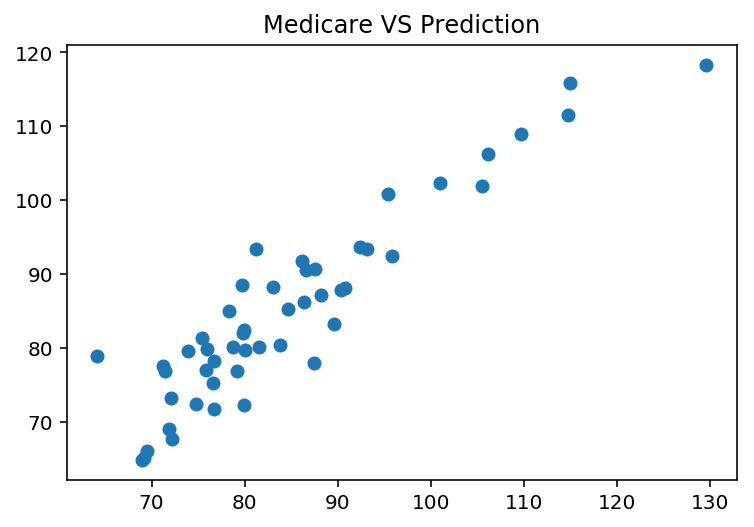

In [628]:
# Perform cross-validation with a five-fold split.
score = cross_val_score(lr3, X2i, y2i, cv=5)
print("Cross-validated scores:", score)

# Make cross-validated predictions on the testing sets.
Predss = cross_val_predict(lr3, X2i, y2i, cv=9)
plt.scatter(y2i, Predss)
plt.title('Medicare VS Prediction')

# Manually calculate the R2.
r = metrics.r2_score(y2i, Predss)
print("Cross-Predicted R2:", r)

In [629]:
Predi = pd.DataFrame()
Predi['State'] = df_xx['State']
Predi['True'] = y2i
Predi['Prediction'] = Predss

In [630]:
Predi.head()

,State,True,Prediction
0,Mississippi,71.241758,77.620253
1,New Mexico,83.001114,88.273807
2,Louisiana,73.877046,79.663575
3,Alabama,64.180071,78.977116
4,South Carolina,78.763315,80.184400


In [633]:
# write out to csv
Predi.to_csv('../datasets/Predi.csv', index=False)

### Using a Linear Regression model below

In [3229]:
# subseting dataframe into target and predictor variable.
yi = df_xx.AvgMedicarePay
# this means select all variable/features name that is not AverageMedicarePay and State
Xi = df_xx[['ratio_child', 'Adult_smoking','Income', 'ratio_num_prov', 'ratio_avgspend', 'Pop_over_all','Poverty_overall', 
        'ratio_education', 'TaxRate', 'ratio_median','ratio_total_disch']]

In [3230]:
X_traini, X_testi, y_traini, y_testi = train_test_split(Xi, yi, test_size=0.4)
print(X_traini.shape, y_traini.shape)
print(X_testi.shape, y_testi.shape)

(30, 11) (30,)
(20, 11) (20,)


In [3231]:
# instanciating model class
lri = LinearRegression()

# fitting model on training data
lri.fit(X_traini, y_traini)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [3232]:
# model score
lri.score(X_testi, y_testi)

0.89086229293192376

In [3233]:
# model prediction on testing data
predi = lri.predict(X_testi)

In [3234]:
# creating a dataframe to house both true value of data and it's predicted value made by the model
predictions = pd.DataFrame()
predictions['True_value'] = y_testi
predictions['predicted'] = predi
predictions['State'] = df_xx['State']
predictions = predictions[['State','True_value','predicted']]
# dataframe containing both true value and it's predictions
predictions = predictions.reset_index(drop=True)

In [3235]:
predictions.head()

,State,True_value,predicted
0,Nevada,87.476028,76.257792
1,Minnesota,86.192150,93.709374
2,Virginia,75.388470,84.504206
3,New Jersey,95.869401,93.055006
4,Colorado,81.509314,79.865315


Text(0.5,1,'Medicare spending prediction using linear regression')

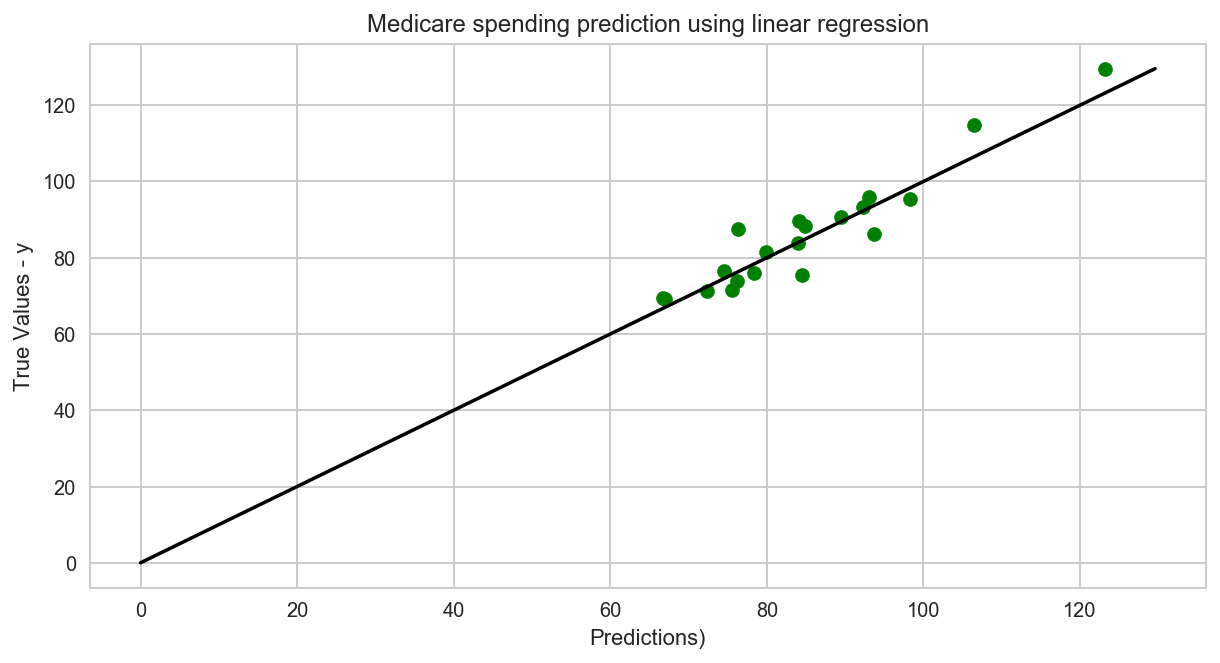

In [3236]:
# Plot showing the True value and the  Ordinary Least Squares (OLS) model predictions.
# create a figure
fig = plt.figure(figsize=(10,5))
# get the axis of that figure
ax = plt.gca()

# plot a scatter plot on it with our data
ax.scatter(predictions['predicted'], predictions['True_value'], c='g')
plt.plot([0, np.max(predictions['True_value'])], [0, np.max(predictions['True_value'])], c = 'black')

    
ax.set_xlabel('Predictions)')
ax.set_ylabel('True Values - y')
ax.set_title('Medicare spending prediction using linear regression')

### Using Linear Regression model on PCA features

In [2730]:
#y = features.AvgMedicarePay.values
#Xp = features.iloc[:,:11]

In [3244]:
Xi['State'] = features['State']

C:\Users\nonob\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [3278]:
X_trainx, X_testx, y_trainx, y_testx = train_test_split(Xi, y, test_size=0.5)
print(X_trainx.shape, y_trainx.shape)
print(X_testx.shape, y_testx.shape)

(25, 12) (25,)
(25, 12) (25,)


In [3279]:
X_trainxi = X_trainx.drop('State', axis=1)
X_testxi = X_testx.drop('State', axis=1)

In [3280]:
# instanciating model class
lrx = LinearRegression()

# fitting model on training data
lrx.fit(X_trainxi, y_trainx)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [3281]:
# model score
lrx.score(X_testxi, y_testx)

0.89976992669478706

In [3282]:
# model prediction on testing data
predn = lrx.predict(X_testxi)

In [3283]:
# creating a dataframe to house both true value of data and it's predicted value made by the model
predictn = pd.DataFrame()
predictn['True_value'] = y_testx
predictn['predicted'] = predn
predictn['State'] = X_testx['State']
predictn = predictn[['State','True_value','predicted']]
# dataframe containing both true value and it's predictions
predictn = predictn.reset_index(drop=True)

In [3284]:
predictn.sort_values(by='True_value', ascending=False).head()

C:\Users\nonob\Anaconda3\lib\site-packages\IPython\core\displayhook.py:271: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


,State,True_value,predicted
22,Alaska,129.589694,122.289474
17,Vermont,105.469700,103.217517
4,Connecticut,101.045929,101.701267
18,Massachusetts,92.417193,93.472474
5,Delaware,89.596733,84.606359


### CLASSIFICATION
#### Using RandomForest Classifer

In [185]:
# Function to categorize the target column and set the variable to LABEL
df_xx['label'] = df_xx['AvgMedicarePay'].map(lambda x: 1 if x > df_xx['AvgMedicarePay'].quantile(.75) else 0)

In [186]:
# count of binary classes
df_xx['label'].value_counts()

0    37
1    13
Name: label, dtype: int64

In [190]:
# Establishing our baseline accuracy
baseline_accuracy = df_xx['label'].value_counts()[0]/len(df_xx['label'])
baseline_accuracy

0.73999999999999999

In [194]:
# subseting dataframe into target and predictor variable.
y_class = df_xx.label
# this means select all variable/features name that is not AverageMedicarePay
X_class = df_xx[['State','ratio_child', 'Adult_smoking','Income', 'ratio_num_prov', 'ratio_avgspend', 'Pop_over_all',
                 'Poverty_overall', 'ratio_education', 'TaxRate', 'ratio_median','ratio_total_disch']]

In [195]:
# Train_test_split
X_train_cl, X_test_cl, y_train_cl, y_test_cl = train_test_split(X_class, y_class, test_size = 0.40)

In [198]:
# Dropping the name column from both the test and train set. 
X_train_cl = X_train_cl.drop('State', axis = 1)

#X_test_name = X_test_cl[['State']]
X_test_name = X_test_cl.drop('State', axis = 1)

In [202]:
# Creating a model for Pipeline
model_cl = Pipeline([
    ('Standardization', StandardScaler()),
    ('RandomForestClassifier', RandomForestClassifier())
    ])

In [203]:
# Parameters for the RandomForestClassifier
param1 = {
    'RandomForestClassifier__n_estimators': [10, 20, 30],
    'RandomForestClassifier__criterion': ['gini', 'entropy'],
    'RandomForestClassifier__max_features': ['auto', 'log2', 'sqrt'],
    'RandomForestClassifier__n_jobs': [-1, 1]
        }

In [204]:
# Grid Search
grid_cl = GridSearchCV(model_cl, param_grid = param1, verbose=1)
grid_cl.fit(X_train_cl, y_train_cl)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:   21.4s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('Standardization', StandardScaler(copy=True, with_mean=True, with_std=True)), ('RandomForestClassifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, mi...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'RandomForestClassifier__n_estimators': [10, 20, 30], 'RandomForestClassifier__criterion': ['gini', 'entropy'], 'RandomForestClassifier__max_features': ['auto', 'log2', 'sqrt'], 'RandomForestClassifier__n_jobs': [-1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [205]:
# Best Score from the Random Forest Classifier
grid_cl.best_score_

0.93333333333333335

In [206]:
# Best parameters from the Random Forest Classifier 
grid_cl.best_params_

{'RandomForestClassifier__criterion': 'gini',
 'RandomForestClassifier__max_features': 'log2',
 'RandomForestClassifier__n_estimators': 10,
 'RandomForestClassifier__n_jobs': 1}

In [208]:
# Best score on the test set.
grid_cl.best_estimator_.score(X_test_name, y_test_cl)

0.94999999999999996

In [209]:
# Random Forest Classifer Predictions
class_Pred = grid_cl.predict(X_test_name)

In [210]:
# Accuracy score
accuracy_score(y_test_cl, class_Pred)

0.94999999999999996

In [212]:
from sklearn.metrics import confusion_matrix, classification_report

In [214]:
# Classification report
classification = classification_report(y_test_cl, class_Pred)

# Classification report
print(classification)

             precision    recall  f1-score   support

          0       0.94      1.00      0.97        15
          1       1.00      0.80      0.89         5

avg / total       0.95      0.95      0.95        20



In [216]:
# Probabilities of the predictions
class_pred_prob = grid_cl.predict_proba(X_test_name)

# Probabilities.
class_pred_prob[:, 1]

array([ 0.6,  0.7,  0. ,  0.8,  0.3,  0. ,  0.4,  0. ,  0. ,  0.3,  0.7,
        0.1,  0.1,  0.2,  0. ,  0.1,  0.4,  0. ,  0. ,  0.1])

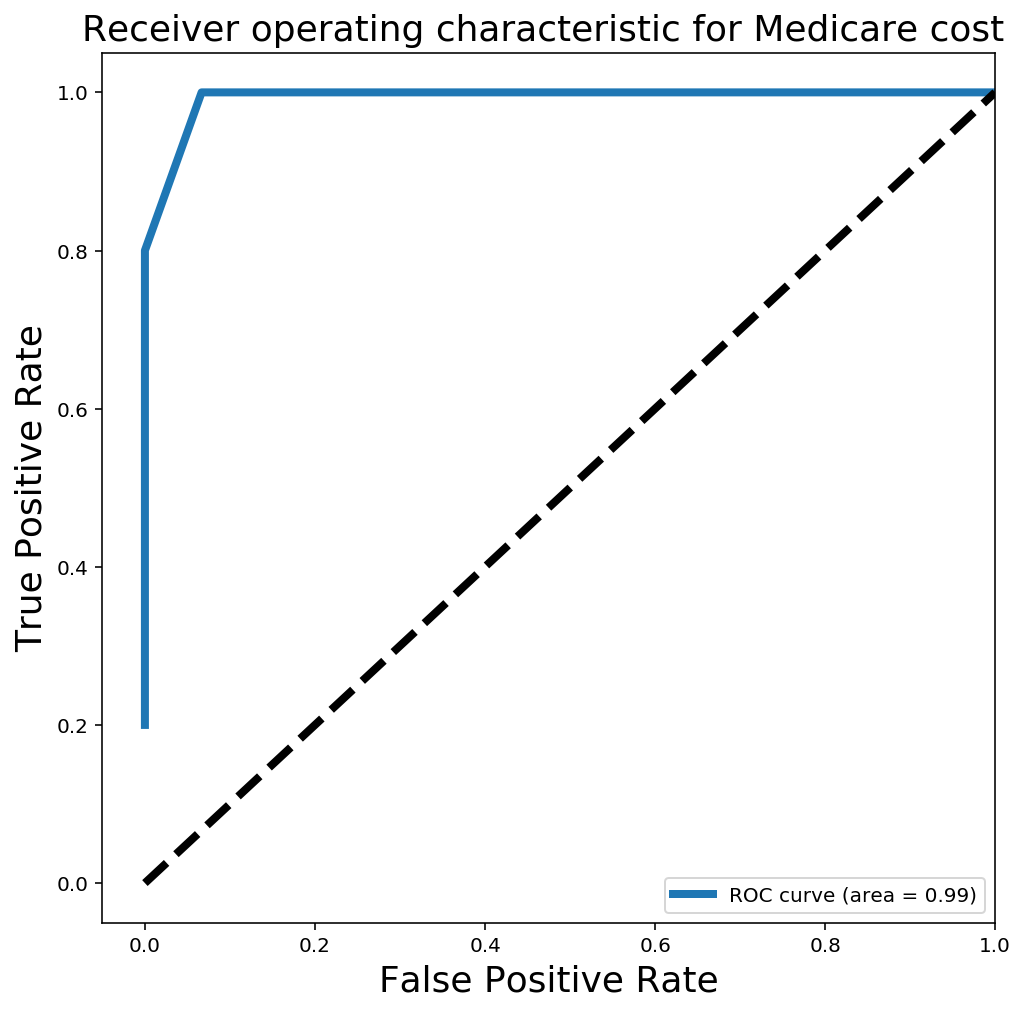

In [217]:
# ROC Curve for Random Forest Classifier 
from sklearn.metrics import roc_curve, auc #auc = area under curve

fpr, tpr, thresh = roc_curve(y_test_cl, class_pred_prob[:, 1])
roc_auc = auc(fpr, tpr)



plt.figure(figsize=[8,8])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for Medicare cost ', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [221]:
# Creating a dataframe to house the classifier prediction and it's true values
class_prediction = pd.DataFrame()

In [224]:
# True value for classification target column
class_prediction['True_classification'] = y_test_cl

# Predictions for the classification using Random Forest Classifier.
class_prediction['class_Predict'] = class_Pred

In [226]:
class_prediction['State'] = X_test_cl['State']

class_prediction = class_prediction[['State','True_classification','class_Predict']].reset_index(drop=True)

In [234]:
class_prediction.head()

,State,True_classification,class_Predict
0,Massachusetts,1,1
1,Rhode Island,1,1
2,Arkansas,0,0
3,Alaska,1,1
4,Colorado,0,0


In [235]:
pd.crosstab(class_prediction['True_classification'], class_prediction['class_Predict'], rownames=['Actual'], 
            colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,15,0,15
1,1,4,5
All,16,4,20
